PROJET N°7-2 : MODELISATION
===========================

***Implémentez un modèle de scoring***

**Auteur:** *Jean EMIDIO*

**But**

- Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

- L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.)

**Mission 1**

- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Analyser les features qui contribuent le plus au modèle, d’une manière générale (feature importance globale) et au niveau d’un client (feature importance locale), afin, dans un soucis de transparence, de permettre à un chargé d’études de mieux comprendre le score attribué par le modèle.
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API et réaliser une interface de test de cette API.
- Mettre en œuvre une approche globale MLOps de bout en bout, du tracking des expérimentations à l’analyse en production du data drift.

**Mission 2**

Afin de pouvoir faire évoluer régulièrement le modèle, je souhaite tester la mise en œuvre une démarche de type MLOps d’automatisation et d’industrialisation de la gestion du cycle de vie du modèle. 

Vous trouverez en pièce jointe la liste d’outils à utiliser pour créer une plateforme MLOps qui s’appuie sur des outils Open Source. 

Je souhaite que vous puissiez mettre en oeuvre au minimum les étapes orientées MLOps suivantes : 

- Dans le notebook d’entraînement des modèles, générer à l’aide de MLFlow un tracking d'expérimentations
- Lancer l’interface web 'UI MLFlow" d'affichage des résultats du tracking
- Réaliser avec MLFlow un stockage centralisé des modèles dans un “model registry”
- Tester le serving MLFlow
- Gérer le code avec le logiciel de version Git
- Partager le code sur Github pour assurer une intégration continue
- Utiliser Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Concevoir des tests unitaires avec Pytest (ou Unittest) et les exécuter de manière automatisée lors du build réalisé par Github Actions
 
J’ai également rassemblé des conseils pour vous aider à vous lancer dans ce projet !

Concernant l’élaboration du modèle soyez vigilant sur deux points spécifiques au contexte métier : 
- Le déséquilibre entre le nombre de bons et de moins bons clients doit être pris en compte pour élaborer un modèle pertinent, avec une méthode au choix
- Le déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge)
Vous pourrez supposer, par exemple, que le coût d’un FN est dix fois supérieur au coût d’un FP
Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles, afin de choisir le meilleur modèle et ses meilleurs hyperparamètres. Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum)
En parallèle, maintenez pour comparaison et contrôle des mesures plus techniques, telles que l’AUC et l’accuracy 

D’autre part je souhaite que vous mettiez en œuvre une démarche d’élaboration des modèles avec Cross-Validation et optimisation des hyperparamètres, via GridsearchCV ou équivalent.

Un dernier conseil : si vous obtenez des scores supérieurs au 1er du challenge Kaggle (AUC > 0.82), posez-vous la question si vous n’avez pas de l’overfitting dans votre modèle !

Vous exposerez votre modèle de prédiction sous forme d’une API qui permet de calculer la probabilité de défaut du client, ainsi que sa classe (accepté ou refusé) en fonction du seuil optimisé d’un point de vue métier.

Le déploiement de l’API sera réalisée sur une plateforme Cloud, de préférence une solution gratuite.

Je vous propose d’utiliser un Notebook ou une application Streamlit pour réaliser en local  l’interface de test de l’API.

**Objectifs pédagogiques**

- Définir et mettre en œuvre un pipeline d’entraînement des modèles
- Définir la stratégie d’élaboration d’un modèle d’apprentissage supervisé
- Évaluer les performances des modèles d’apprentissage supervisé
- Mettre en œuvre un logiciel de version de code
- Suivre la performance d’un modèle en production et en assurer la maintenance
- Concevoir un déploiement continu d'un moteur d’inférence sur une plateforme Cloud

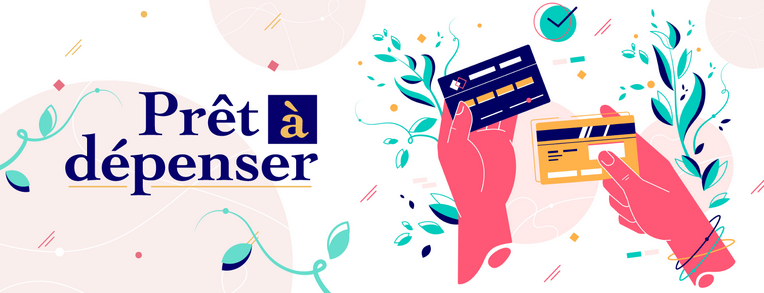

**Outils Open Source pour élaborer une plateforme MLOps**

- MLFlow pour la gestion “d’expériences” et leur tracking lors de la phase d’entraînement des modèles, ainsi que la visualisation des résultats avec MLFlow UI
- MLFlow pour le stockage centralisé des modèles dans un “model registry” et le serving
- Git, logiciel de version de code, pour suivre les modifications du code final de l’API de prédiction à déployer
- Github pour stocker et partager sur le cloud le code de l’API, alimenté par un “push” Git et ainsi assurer une intégration continue
- Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Pytest (ou Unittest) pour concevoir les tests unitaires et les exécuter de manière automatisée lors du build réalisé par Github

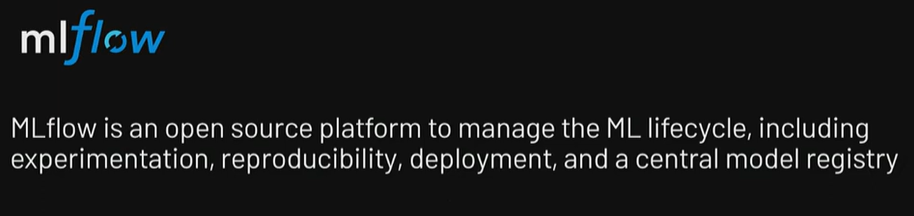

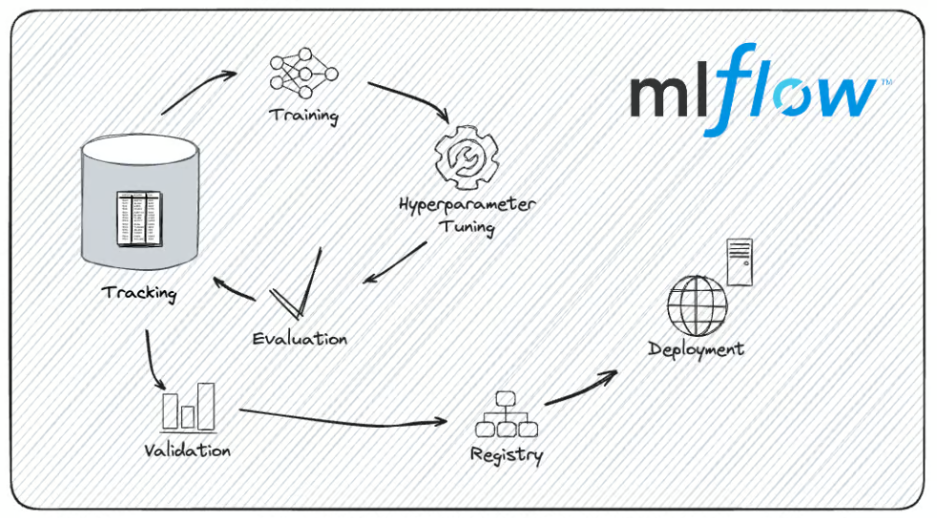

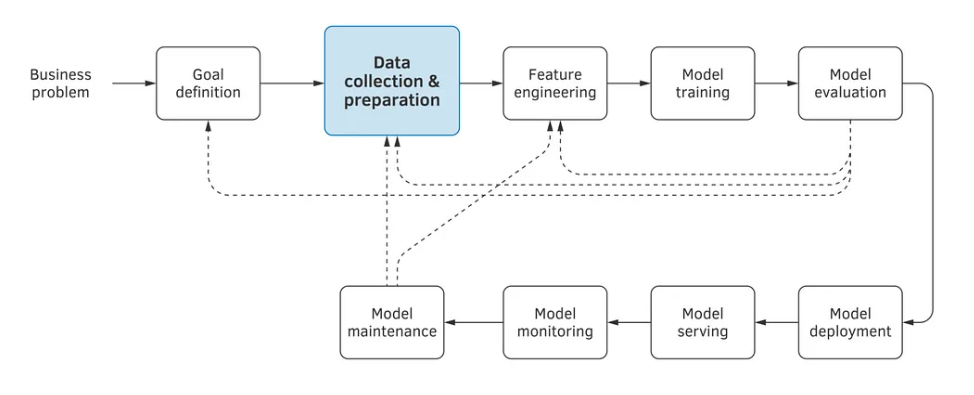

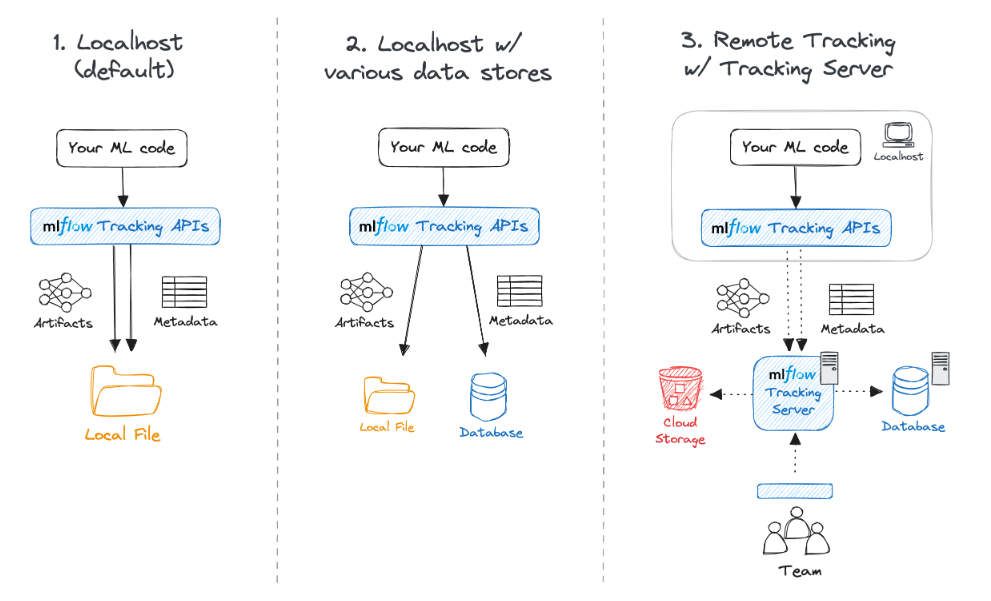

**ROC (Receiver Operating Characteristic) :**

La courbe ROC est une représentation visuelle des performances du modèle pour tous les seuils. La version longue du nom, "Receiver Operating Characteristic" (caractéristique opérationnelle du récepteur) est une retenue des systèmes de détection de radars de la Seconde Guerre mondiale.

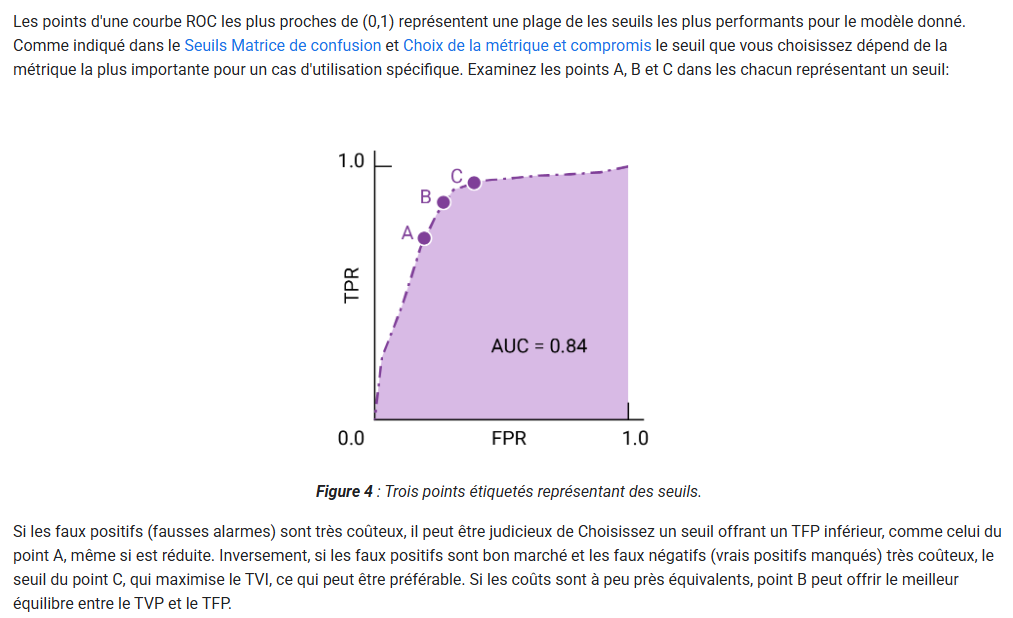

**F1-score :**

Le score F1 correspond à la moyenne harmonique (une sorte de moyenne) de la précision et du rappel. Cette métrique équilibre l'importance de la précision et du rappel, et est préférable à la précision pour les ensembles de données déséquilibrés

- Rappel ou taux de vrais positifs :

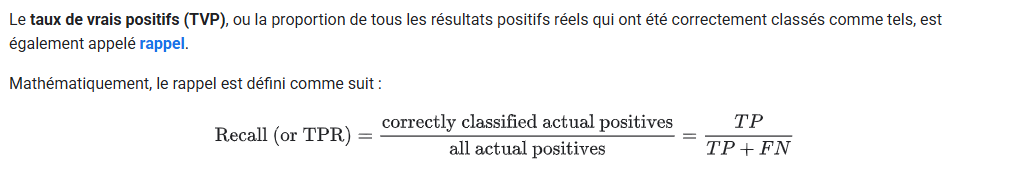

- Taux de faux positifs :

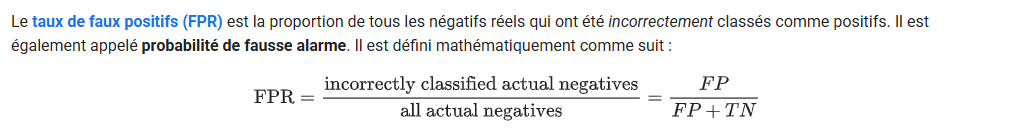

- Précision

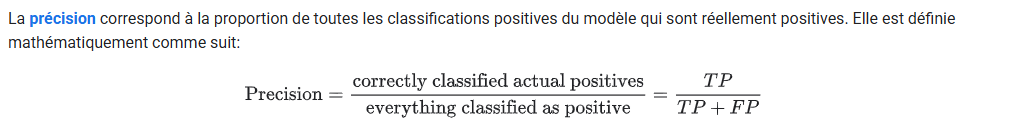

- Les FN et FP dans le cas de ce projet :

Dans ce projet il est préférable d'avoir plus de FP que de FN. En effet pour une banque qui accorde un crédit, il vaut mieux ne pas accorder un prêt à des FP, qu'accorder un prêt à des FN et être du coup en défaillance.

**Table of contents**<a id='toc0_'></a>    
- [Les datas](#toc1_)    
  - [Import](#toc1_1_)    
  - [Initialisations](#toc1_2_)    
  - [Fonctions](#toc1_3_)    
  - [Dataset](#toc1_4_)    
- [Réduction du dataset](#toc2_)    
- [Sauvegarde du dataset réduit](#toc3_)    
- [Modélisation](#toc4_)    
  - [Equilibrage des classes](#toc4_1_)    
  - [Premières modélisations](#toc4_2_)    
  - [Optimisation des modèles](#toc4_3_)    
  - [Sélection du modèle final](#toc4_4_)    
  - [Le modèle final](#toc4_5_)    
- [Explicabilité](#toc5_)    
- [Exportation du modèle final](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Les datas](#toc0_)

## <a id='toc1_1_'></a>[Import](#toc0_)

In [187]:
import warnings
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
print(sklearn.__version__)

1.5.1


In [189]:
import random
import mlflow
import shap

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from mlflow.models.signature import infer_signature

## <a id='toc1_2_'></a>[Initialisations](#toc0_)

In [191]:
# Initialisations :
SEED = 15 # Ici on définit RANDOM_SEED = constant seulement pour la reproductibilité
warnings.filterwarnings('ignore')

# Paramètres d'affichage :
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Formats :
sns.set_style("whitegrid")
font_title = {
  "family": "serif",
  "color":  "black",
  "weight": "bold",
  "size": 20
}

random.seed(SEED)

In [192]:
mlflow.set_tracking_uri('http://127.0.0.1:5000/')
# mlflow.autolog(log_input_examples=True, silent=True)

## <a id='toc1_3_'></a>[Fonctions](#toc0_)

In [193]:
import fonctions_python as fc
import importlib
importlib.reload(fc)

<module 'fonctions_python' from 'c:\\Users\\jme1401\\Desktop\\OCR\\7-Implémentez un modèle de scoring\\Datas\\fonctions_python.py'>

Nous créons les fonctions que nous utiliserons dans la suite de la modélisation. Ces fonctions permettent notamment de calculer certaines métriques et graphes à des fins de comparaison des performances de nos modèles.

Nous crééons une métrique personnalisée ayant une approche métier. Le but ici est de pénaliser plus fortement les faux négatifs (mauvais client prédit bon client) qui engendrent une grande perte de capital. On suppose ici que le coût d’un FN (Faux Négatif) est dix fois supérieur au coût d’un FP (Faux Positif).

Nous calculerons également d'autres métriques telles que :
- **Accuracy** : somme de tous les vrais positifs et vrais négatifs qu'il divise par le nombre total d'instances. Il permet d'apporter une réponse à la question suivante : de toutes les classes positives et négatives, combien parmi elles ont été prédites correctement ? Des valeurs élevées de ce paramètre sont souvent souhaitables.
- **Precision** :  indique le rapport entre les prévisions positives correctes et le nombre total de prévisions positives. Ce paramètre répond donc à la question suivante : sur tous les enregistrements positifs prédits, combien sont réellement positifs ? 
- **Recall/Rappel** : paramètre qui permet de mesurer le nombre de prévisions positives correctes sur le nombre total de données positives. Il permet de répondre à la question suivante : sur tous les enregistrements positifs, combien ont été correctement prédits ? La mesure vise à minimiser les faux négatifs.
- **F1 score** : moyenne harmonique de la précision et du rappel. Il équivaut au double du produit de ces deux paramètres sur leur somme. Sa valeur est maximale lorsque le rappel et la précision sont équivalents. Il est particulièrement difficile de comparer deux modèles avec une faible précision et un rappel élevé. Le contraire est également vérifié. Dans ces conditions, le score F1 permet de mesurer ces deux paramètres simultanément.
- **Fbeta score** : généralisation de la F-measure qui ajoute un paramètre de configuration appelé beta. Une valeur bêta par défaut est 1.0, ce qui est identique à la mesure F. Une valeur bêta plus petite, telle que 0.5, donne plus de poids à la précision et moins au rappel, tandis qu'une valeur bêta plus grande, telle que 2.0, donne moins de poids à la précision et plus de poids au rappel dans le calcul du score. Ici nous donnons plus de poids au rappel qui minimise les faux négatifs.
- **ROC AUC score** : mesure de façon globale la performance d’un modèle de classification. Il indique à quel point le modèle est capable de faire la distinction entre les classes. Il est égal à 1 pour un modèle parfait et à 0.5 pour un modèle non-informatif. 

In [194]:
def fc_score_metier(y_true, y_pred):
    '''Créer un score métier à partir de la matrice de confusion.
    :param: y_true (vraies valeurs), y_pred (valeurs prédites par le modèle)
    :return: gain (score métier)
    '''
    TP_coeff = 0       # Vrai positif (prédit comme faisant défaut (1))
    FP_coeff = 0       # Faux positif (prédit comme faisant défaut (1) mais ne fait pas défaut (0))
    FN_coeff = -10     # Faux négatif (prédit comme ne faisant pas défaut (0) mais fait défaut (1))
    TN_coeff = 1       # Vrai négatif (prédit comme ne faisant pas défaut (0))
    
    (TN, FP, FN, TP) = metrics.confusion_matrix(y_true, y_pred).ravel()
    
    gain = (TP * TP_coeff + TN * TN_coeff + FP * FP_coeff + FN * FN_coeff) / (TN + FP + FN + TP)
    
    return gain


def fc_score_metier_max(y_pred_proba, y_true, verbose=True):
    '''Créer un graphique permettant de déterminer quel peut être le score max en fonction du threshold.
    :param: y_pred_proba (probabilités prédites par le modèle), y_true (vraies valeurs), verbose (affiche le graphe ou juste le score maximal)
    :return: graphique, 
    '''
    scores = []
    for threshold in np.linspace(0, 1, num=101):
        y_pred = np.where(y_pred_proba > threshold, 1, 0)
        score = fc_score_metier(y_true, y_pred)
        scores.append(score)

    if verbose == True:
        score_max = max(scores)
        opti_threshold = np.linspace(0, 1, num=101)[scores.index(score_max)]
        y_pred = np.where(y_pred_proba > opti_threshold, 1, 0)
        
        print("Score métier maximum : {:.2f}".format(score_max))
        print("Threshold optimal : {}".format(opti_threshold))
        
        fig, ax = plt.subplots(figsize=(6, 5))
        plt.plot(np.linspace(0, 1, num=101), scores, label="model score")
        plt.axvline(x=opti_threshold, color='k', dashes=(0.5, 1), label="optimal threshold: {}".format(opti_threshold))
        plt.title("Score métier en fonction du threshold", fontsize=10)
        plt.xlabel("Thresholds", fontsize=10)
        plt.ylabel("Score métier", fontsize=10)
        plt.legend()
        plt.show()
     
    else:
        return max(scores)

    
def fc_conf_mat_transform(y_true, y_pred):
    '''Créer et affiche la matrice de confusion.
    :param: y_true (valeurs réelles), y_pred (valeurs prédites par le modèle)
    :return: affiche la matrice de confusion
    '''
    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize = (6, 4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues")
    
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de confusion')


def fc_eval_score(model, X_val, y_true, seuil=0.5):
    '''Calcule, affiche et enregistre les différentes métriques.
    :param: model, X_val (dataframe de validation), y_true (valeurs réelles), seuil (seuil de détermination des prédictions)
    :return: affiche (et return) les métriques, la matrice de confusion et la courbe ROC.
    '''    
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = np.where(y_pred_proba > seuil, 1, 0)
    
    metier = fc_score_metier(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1_score = metrics.f1_score(y_true, y_pred)
    fbeta_score = metrics.fbeta_score(y_true, y_pred, beta=2)
    rocauc = metrics.roc_auc_score(y_true, y_pred)
    
    print('Score métier :{:.2f}'.format(metier))
    print('Accuracy score : {:.2f}'.format(accuracy))
    print('Precision score : {:.2f}'.format(precision))
    print('Recall score : {:.2f}'.format(recall))
    print('F1 score : {:.2f}'.format(f1_score))
    print('Fbeta score : {:.2f}'.format(fbeta_score))
    print('ROC AUC score : {:.2f}'.format(rocauc))
    
    fc_conf_mat_transform(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(6, 5))
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Courbe ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f / %0.2f' % (rocauc, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrais positifs')
    plt.xlabel('Taux de faux positifs')
    plt.show()
    
    return metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba

In [195]:
def fc_plot_learning_curve(estimator, X, y):
    '''Affiche la courbe d'apprentissage.
    :param: estimator (meilleur estimateur de la grid search), X (valeurs), y (target)    
    '''
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        verbose=0
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Performance score métier')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [196]:
def fc_data_scaled(path_models, X, y, SEED=SEED):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=SEED)
    X_val, X_val_test, y_val, y_val_test = train_test_split(X_val, y_val, test_size=0.20, stratify=y_val, random_state=SEED)

    cols = X_train.select_dtypes(['float64']).columns

    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_val_test_scaled = X_val_test.copy()

    standard_scale = StandardScaler()
    standard_scale.fit(X_train[cols])

    X_train_scaled[cols] = standard_scale.transform(X_train[cols])
    X_val_scaled[cols] = standard_scale.transform(X_val[cols])
    X_val_test_scaled[cols] = standard_scale.transform(X_val_test[cols])

    fc.save_pickle(X_train, "X_train.pkl", path_models)
    fc.save_pickle(y_train, "y_train.pkl", path_models)
    fc.save_pickle(X_val, "X_val.pkl", path_models)
    fc.save_pickle(y_val, "y_val.pkl", path_models)
    fc.save_pickle(X_val_test, "X_val_test.pkl", path_models)
    fc.save_pickle(y_val_test, "y_val_test.pkl", path_models)
    fc.save_pickle(X_train_scaled, "X_train_scaled.pkl", path_models)
    fc.save_pickle(X_val_scaled, "X_val_scaled.pkl", path_models)
    fc.save_pickle(X_val_test_scaled, "X_val_test_scaled.pkl", path_models)

    X_train = fc.load_pickle("X_train.pkl", path_models)
    y_train = fc.load_pickle("y_train.pkl", path_models)
    X_val = fc.load_pickle("X_val.pkl", path_models)
    y_val = fc.load_pickle("y_val.pkl", path_models)
    X_val_test = fc.load_pickle("X_val_test.pkl", path_models)
    y_val_test = fc.load_pickle("y_val_test.pkl", path_models)
    X_train_scaled = fc.load_pickle("X_train_scaled.pkl", path_models)
    X_val_scaled = fc.load_pickle("X_val_scaled.pkl", path_models)
    X_val_test_scaled = fc.load_pickle("X_val_test_scaled.pkl", path_models)

    return (X_train, y_train, X_val, y_val, X_val_test, y_val_test, X_train_scaled, X_val_scaled, X_val_test_scaled)

## <a id='toc1_4_'></a>[Dataset](#toc0_)

In [197]:
path_datas_init = "./datas/datas_init/"
path_datas_save = "./datas/datas_save/"
path_models = "./models/"
path_model_final = "./model_final/"

In [198]:
df_datas_train = pd.read_csv(path_datas_save + 'df_datas_train_cleaned.csv').set_index('SK_ID_CURR')
df_datas_test = pd.read_csv(path_datas_save + 'df_datas_test_cleaned.csv').set_index('SK_ID_CURR')

In [199]:
df_datas_train.shape

(307507, 42)

In [200]:
df_datas_test.shape

(48744, 41)

# <a id='toc2_'></a>[Réduction du dataset](#toc0_)

Afin d'accélerer les temps de calcul, nous réduisons l'échantillon initial pour la détermination de la méthode de clustering. Une fois la méthode choisie, nous utiliserons alors la totalité du dataset.

In [201]:
taux_reduction = 0.1

n_samples = int(taux_reduction * df_datas_train.shape[0])
df_datas_train_reduit = df_datas_train.sample(n_samples, random_state=SEED).copy()

n_samples = int(taux_reduction * df_datas_test.shape[0])
df_datas_test_reduit = df_datas_test.sample(n_samples, random_state=SEED).copy()

In [202]:
df_datas_train_reduit.shape

(30750, 42)

In [203]:
df_datas_test_reduit.shape

(4874, 41)

# <a id='toc3_'></a>[Sauvegarde du dataset réduit](#toc0_)

In [204]:
df_datas_train_reduit.to_csv(path_datas_save + 'df_datas_train_reduit_cleaned.csv', index = True)
df_datas_test_reduit.to_csv(path_datas_save + 'df_datas_test_reduit_cleaned.csv', index = True)

# <a id='toc4_'></a>[Modélisation](#toc0_)

Dans un premier temps, nous réalisons une séparation des données en jeu d'entraînement et jeu de validation puis nous effectuons un scale.

In [131]:
X = df_datas_train_reduit.drop(columns=['TARGET'])
y = df_datas_train_reduit['TARGET']
X_train, y_train, X_val, y_val, X_val_test, y_val_test, X_train_scaled, X_val_scaled, X_val_test_scaled = fc_data_scaled(path_models, X, y)

## <a id='toc4_1_'></a>[Equilibrage des classes](#toc0_)

Nous allons tester différentes méthodes afin de rééquilibrer nos classes qui sont composées à 91.93% de la target 0 contre 8.07% pour la target 1.

Nous testerons ces différentes méthodes avec l'algorithme *LogisticRegression*. 

In [132]:
data_metriques = []

**LogisticRegression sans équilibrage :**

Score métier :0.13
Accuracy score : 0.92
Precision score : 0.40
Recall score : 0.01
F1 score : 0.02
Fbeta score : 0.01
ROC AUC score : 0.50


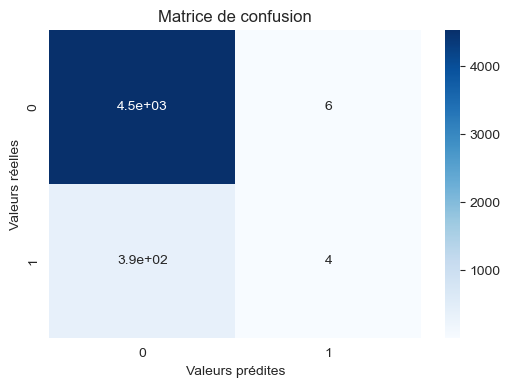

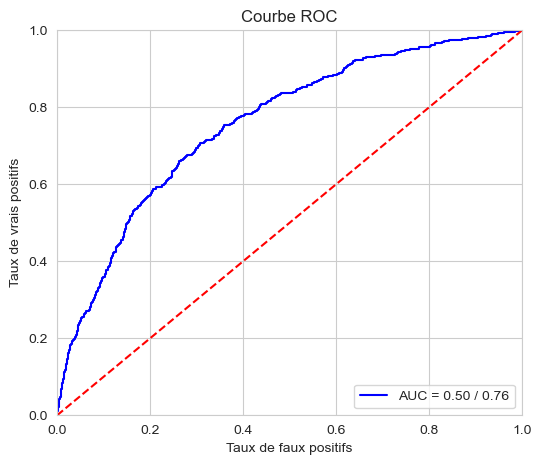

🏃 View run LogisticRegression sans équilibrage at: http://127.0.0.1:5000/#/experiments/0/runs/a2ec51fa62bf40d29bb06559ac445836
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [133]:
with mlflow.start_run(run_name='LogisticRegression sans équilibrage'):
    reg_log_inequal = LogisticRegression(max_iter=1000,random_state=SEED)
    reg_log_inequal.fit(X_train_scaled, y_train)

    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log_inequal, X_val_scaled, y_val)
    data_metriques.append(("Sans équilibrage", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
    
    # Log the loss metric :
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)
    
    # Set a tag that we can use to remind ourselves what this run was for :
    mlflow.set_tag("Training Info", "LogisticRegression sans équilibrage")

**LogisticRegression avec équilibrage class_weight :**

La méthode des *class weight* permet de prendre en compte le caractère biaisé de la distribution du dataset et de créer un modèle pénalisé. Il s’agit ici de simplement attribuer des poids différents aux différentes classes de notre dataset, en donnant un poids plus important aux classes minoritaires, afin d’influencer le modèle lors de son entraînement. Nous pénalisons ainsi plus fortement une erreur de classification d’une classe minoritaire par rapport à une erreur de classification d’une classe majoritaire.

Score métier :0.40
Accuracy score : 0.69
Precision score : 0.16
Recall score : 0.70
F1 score : 0.27
Fbeta score : 0.42
ROC AUC score : 0.70


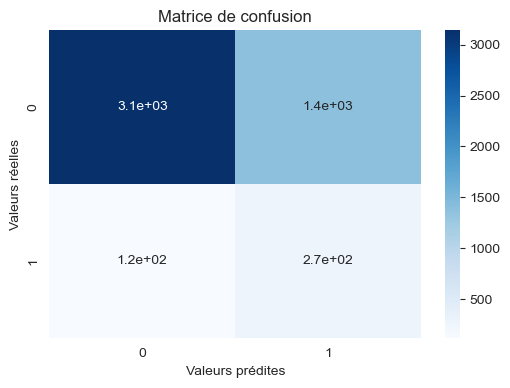

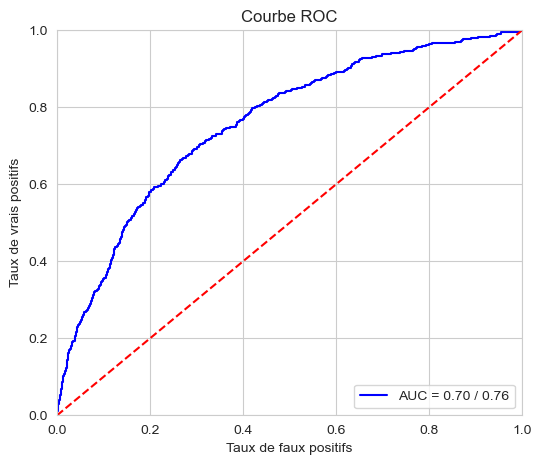

🏃 View run LogisticRegression avec équilibrage class_weight at: http://127.0.0.1:5000/#/experiments/0/runs/10283942bf7a4109946de8b028867a25
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [134]:
with mlflow.start_run(run_name='LogisticRegression avec équilibrage class_weight'):
    reg_log_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
    reg_log_balanced.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log_balanced, X_val_scaled, y_val)
    data_metriques.append(("Equilibrage class_weight", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
    
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**LogisticRegression avec équilibrage oversampling SMOTE :**

L'oversampling (sur-échantillonnage) est une technique utilisée pour remédier au déséquilibre de classes dans un jeu de données, où une classe est sous-représentée par rapport à une autre classe. L'objectif de l'oversampling est de générer des échantillons synthétiques de la classe minoritaire afin d'équilibrer les classes et d'améliorer les performances du modèle.

Le SMOTE, acronyme pour Synthetic Minority Oversampling TEchnique, est une méthode de suréchantillonnage des observations minoritaires. Pour éviter de réaliser un simple clonage des individus minoritaires, le SMOTE se base sur un principe simple : générer de nouveaux individus minoritaires qui ressemblent aux autres, sans être strictement identiques. Cela permet de densifier de façon plus homogène la population d’individus minoritaires.

Equilibre des classes : Counter({0: 22648, 1: 1952})
Equilibre des classes : Counter({0: 22648, 1: 22648})
Score métier :0.27
Accuracy score : 0.75
Precision score : 0.14
Recall score : 0.43
F1 score : 0.22
Fbeta score : 0.31
ROC AUC score : 0.60


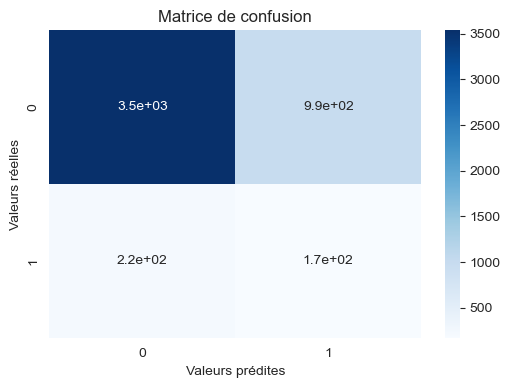

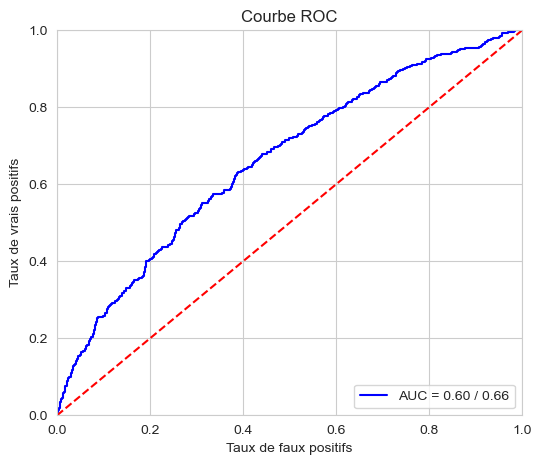

🏃 View run LogisticRegression avec équilibrage oversampling SMOTE at: http://127.0.0.1:5000/#/experiments/0/runs/345343d687644f6687f07f30e37fe4fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [135]:
print('Equilibre des classes : {}'.format(Counter(y_train)))

# Création de l'objet SMOTE
sm = SMOTE(random_state=SEED)

# Application du SMOTE aux données
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes : {}'.format(Counter(y_train_sm)))

with mlflow.start_run(run_name='LogisticRegression avec équilibrage oversampling SMOTE'):
    reg_log_up = LogisticRegression(max_iter=1000, random_state=SEED)
    reg_log_up.fit(X_train_sm, y_train_sm)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log_up, X_val_scaled, y_val)
    data_metriques.append(("Equilibrage SMOTE", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**LogisticRegression avec équilibrage undersampling TomekLinks :**

L'undersampling (sous-échantillonnage) est une technique utilisée pour remédier au déséquilibre de classes dans un jeu de données, où une classe est sur-représentée par rapport à une autre classe. L'objectif de l'undersampling est de réduire le nombre d'échantillons de la classe majoritaire afin d'équilibrer les classes et d'améliorer les performances du modèle.

Tomek Links est une approche de sous-échantillonnage de la classe majoritaire. L’idée est de chercher les points de la classe majoritaire qui sont assez proches d’un point de la classe minoritaire. Les paires de points identifiées sont appelées tomek links. Dans chaque tomek link on va retirer le point qui appartient à la classe majoritaire.

Equilibre des classes : Counter({0: 22648, 1: 1952})
Equilibre des classes : Counter({0: 22084, 1: 1952})
Score métier :0.14
Accuracy score : 0.92
Precision score : 0.45
Recall score : 0.01
F1 score : 0.02
Fbeta score : 0.02
ROC AUC score : 0.51


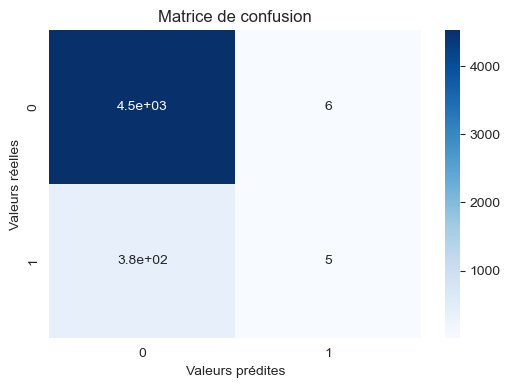

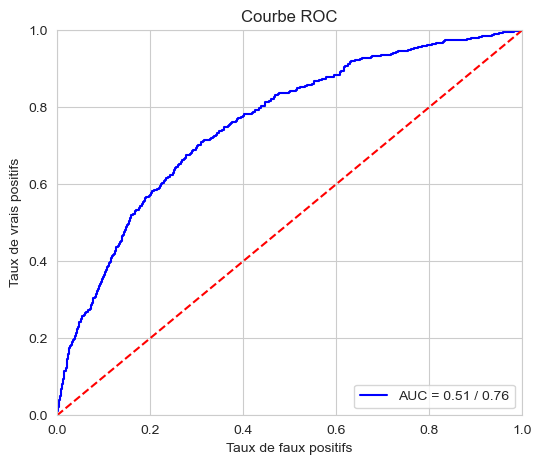

🏃 View run LogisticRegression avec équilibrage undersampling TomekLinks at: http://127.0.0.1:5000/#/experiments/0/runs/a131ec07d8a54a758e11bc183591951f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [136]:
print('Equilibre des classes : {}'.format(Counter(y_train)))

# Création de l'objet TomekLinks
tomek_links = TomekLinks()

# Sous-échantillonnage en utilisant Tomek Links
X_train_tl, y_train_tl = tomek_links.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes : {}'.format(Counter(y_train_tl)))


with mlflow.start_run(run_name='LogisticRegression avec équilibrage undersampling TomekLinks'):
    reg_log_under = LogisticRegression(max_iter=1000, random_state=SEED)
    reg_log_under.fit(X_train_tl, y_train_tl)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log_under, X_val_scaled, y_val)
    data_metriques.append(("Equilibrage TomekLinks", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**LogisticRegression avec équilibrage undersampling RandomUnderSampler :**

Equilibre des classes : Counter({0: 22648, 1: 1952})
Equilibre des classes : Counter({0: 1952, 1: 1952})
Score métier :0.38
Accuracy score : 0.68
Precision score : 0.16
Recall score : 0.69
F1 score : 0.25
Fbeta score : 0.41
ROC AUC score : 0.68


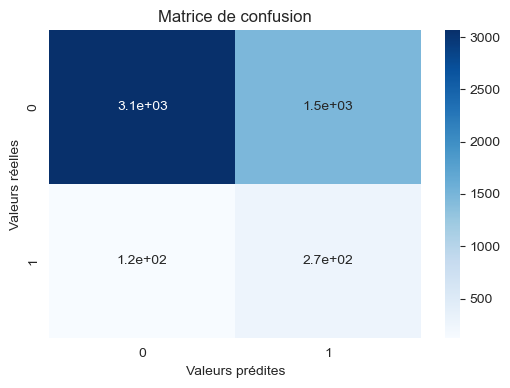

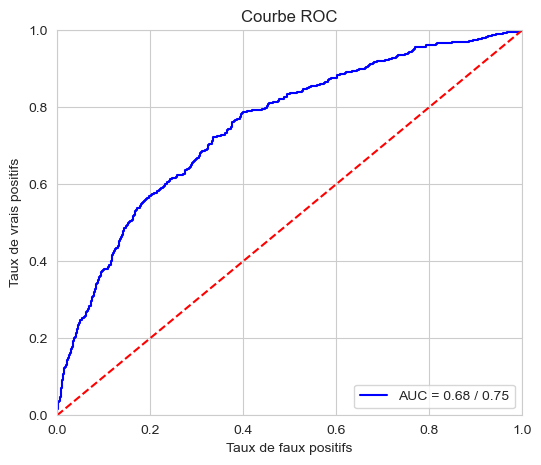

🏃 View run LogisticRegression avec équilibrage undersampling RandomUnderSampler at: http://127.0.0.1:5000/#/experiments/0/runs/d8e6ed78ef404cd98121dcc98ad55c37
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [137]:
print('Equilibre des classes : {}'.format(Counter(y_train)))

# Création de l'objet RandomUnderSampler
under = RandomUnderSampler()

# Sous-échantillonnage en utilisant RandomUnderSampler
X_train_under, y_train_under = under.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes : {}'.format(Counter(y_train_under)))

with mlflow.start_run(run_name='LogisticRegression avec équilibrage undersampling RandomUnderSampler'):
    reg_log_under_r = LogisticRegression(max_iter=1000, random_state=SEED)
    reg_log_under_r.fit(X_train_under, y_train_under)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log_under_r, X_val_scaled, y_val)
    data_metriques.append(("Equilibrage RandomUnderSampler", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**LogisticRegression avec combinaison oversampling-undersampling SMOTETomek :**

SMOTETomek est une technique combinant l'oversampling (SMOTE) et l'undersampling (Tomek Links). Elle vise à résoudre le déséquilibre de classes en augmentant la classe minoritaire par synthèse d'échantillons (SMOTE) tout en réduisant la classe majoritaire en supprimant les exemples qui se trouvent à la frontière entre les classes (Tomek Links).

In [138]:
# Combinaison d'oversampling et d'undersampling : SMOTE (oversampling) et Tomek Links (undersampling)
print('Equilibre des classes : {}'.format(Counter(y_train)))

# Création de l'objet SMOTETomek
smote_tomek = SMOTETomek(random_state=SEED)

# Sous-échantillonnage en utilisant SMOTETomek
X_train_st, y_train_st = smote_tomek.fit_resample(X_train_scaled, y_train)

print('Equilibre des classes : {}'.format(Counter(y_train_st)))

Equilibre des classes : Counter({0: 22648, 1: 1952})
Equilibre des classes : Counter({0: 22648, 1: 22648})


Score métier :0.27
Accuracy score : 0.75
Precision score : 0.14
Recall score : 0.43
F1 score : 0.22
Fbeta score : 0.31
ROC AUC score : 0.60


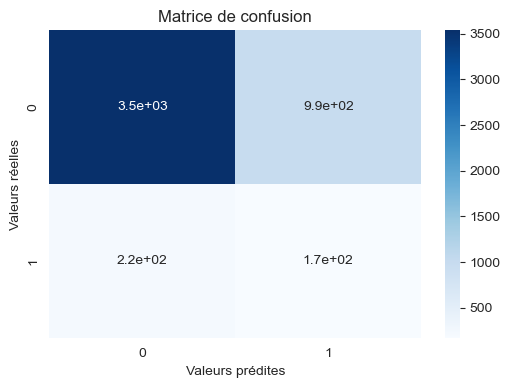

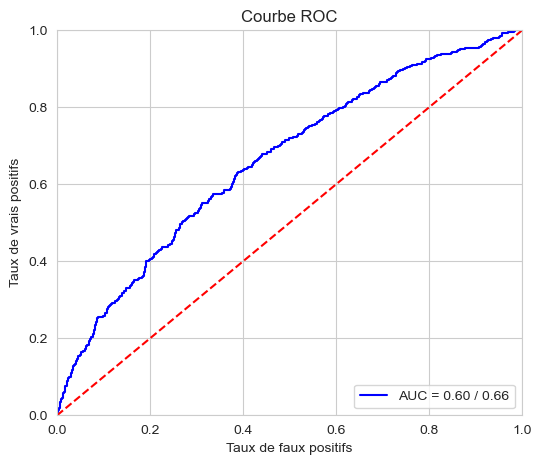

🏃 View run LogisticRegression avec combinaison oversampling-undersampling SMOTETomek at: http://127.0.0.1:5000/#/experiments/0/runs/4b1b17fb8f7e4096b853ee74785f1ff0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [139]:
with mlflow.start_run(run_name='LogisticRegression avec combinaison oversampling-undersampling SMOTETomek'):
    reg_log_combi = LogisticRegression(max_iter=1000, random_state=SEED)
    reg_log_combi.fit(X_train_st, y_train_st)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log_combi, X_val_scaled, y_val)
    data_metriques.append(("Equilibrage SMOTETomek", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**Méthode retenue :**

On choisit la méthode d'undersampling avec *RandomUnderSampler* pour le rééquilibrage de nos données.
En effet les méthodes *class_weight* et *RandomUnderSampler* offrent les meilleurs résultats de score métier. Cependant, l'argument *class_weight* n'est pas disponible pour tous les modèles. De plus, le temps d'exécution de *RandomUnderSampler* est bien inférieur à ceux des autres méthodes. Nous privilégions donc *RandomUnderSampler* afin de pouvoir tester plus de modèles.

In [140]:
df_metriques = pd.DataFrame(data_metriques, columns=["Modele", "score_metier", "accuracy", "precision", "recall", "f1_score", "fbeta_score", "rocauc"])
df_metriques = df_metriques.sort_values(by="score_metier", ascending=False)
display(df_metriques)

Modele  score_metier  accuracy  precision  \
1        Equilibrage class_weight      0.402439  0.693902   0.164663   
4  Equilibrage RandomUnderSampler      0.378862  0.677642   0.155530   
2               Equilibrage SMOTE      0.265650  0.752846   0.143966   
5          Equilibrage SMOTETomek      0.265650  0.752846   0.143966   
3          Equilibrage TomekLinks      0.136992  0.920528   0.454545   
0                Sans équilibrage      0.134959  0.920325   0.400000   

     recall  f1_score  fbeta_score    rocauc  
1  0.702564  0.266796     0.424938  0.697860  
4  0.692308  0.253998     0.409587  0.684344  
2  0.428205  0.215484     0.306985  0.604500  
5  0.428205  0.215484     0.306985  0.604500  
3  0.012821  0.024938     0.015913  0.505748  
0  0.010256  0.020000     0.012739  0.504466

In [141]:
X_train_scaled = X_train_under.copy()
y_train = y_train_under.copy()

In [142]:
X_train_scaled.shape

(3904, 41)

## <a id='toc4_2_'></a>[Premières modélisations](#toc0_)

Nous allons désormais tester différents algorithmes que nous avons séléctionnés, de manière basique, sans optimisation des hyperparamètres. Nous allons travailler sur les algorithmes suivants : 
- **Dummy Classifier (baseline)** : ne prend pas en compte les caractéristiques du jeu de données et se contente de faire des prédictions en utilisant des règles simples. Ici, on renvoie l'étiquette de classe la plus fréquente dans l'argument y observé. 
- **Logistic Regression** : le but est de trouver une relation mathématique entre les variables d'entrée (features) et la variable de sortie (classe prédite). Cette relation est généralement exprimée sous la forme d'une fonction logistique qui transforme la sortie en une probabilité.
- **SVC**: L'algorithme fonctionne en trouvant un hyperplan optimal qui sépare les données d'entraînement en différentes classes. L'hyperplan est déterminé de manière à maximiser la marge entre les points de données de chaque classe. Les points de données les plus proches de l'hyperplan sont appelés vecteurs de support.
- **Decision Tree**: algorithme d'apprentissage automatique qui prend un ensemble de données en entrée et construit un modèle prédictif sous forme d'arbre hiérarchique. Chaque nœud de l'arbre représente une caractéristique de l'ensemble de données, chaque branche représente une règle de décision basée sur cette caractéristique, et chaque feuille représente une classe ou une valeur prédite.
- **Random Forest** : algorithme d'apprentissage automatique qui combine plusieurs arbres de décision pour effectuer des prédictions. Chaque arbre de la forêt donne une prédiction et la classe prédite est déterminée par un vote majoritaire.
- **XG Boost** : utilise un ensemble de modèles d'arbres de décision pour effectuer des prédictions. L'algorithme fonctionne en itérations successives pour minimiser une fonction de perte spécifiée et ajouter des arbres qui réduisent cette perte.
- **Light GBM** : algorithme d'apprentissage automatique basé sur le gradient boosting qui est conçu pour offrir une exécution rapide et des performances élevées. Il utilise une technique d'échantillonnage basée sur le gradient pour sélectionner les échantillons les plus informatifs pendant le processus d'apprentissage.

In [30]:
data_metriques = []

**Modélisation initiale DummyClassifier :**

Score métier :0.13
Accuracy score : 0.92
Precision score : 0.00
Recall score : 0.00
F1 score : 0.00
Fbeta score : 0.00
ROC AUC score : 0.50


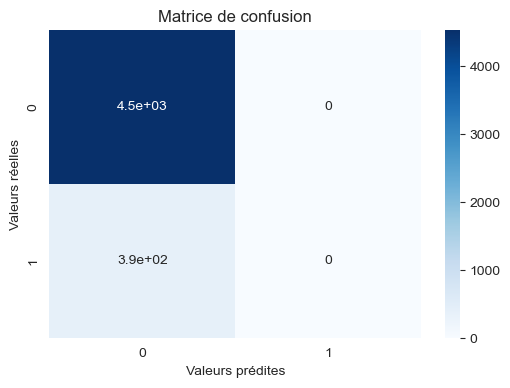

🏃 View run Modélisation initiale DummyClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/6507724308704d2bafc6406f0aa41319
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [31]:
with mlflow.start_run(run_name='Modélisation initiale DummyClassifier'):
    dummy = DummyClassifier(random_state=SEED)
    dummy.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des métriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(dummy, X_val_scaled, y_val)
    data_metriques.append(("DummyClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
    
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Grâce à la matrice de confusion, on constate que le Dummy Classifier prédit bien seulement la classe 0 (client ne faisant pas défaut) et contient donc beaucoup de faux négatifs (mauvais client prédit bon client). C'est la raison pour laquelle il possède un score métier relativement faible (car ce dernier pénalise plus fortement les faux négatifs).

La plupart de nos scores sont à 0 puisque le modèle ne prédit aucune valeur positive. Les scores sont donc estimés à 0 puisque cela engendre une division par 0.

On constate que l'AUC est de 0.5 comme c'est le cas pour les modèles baseline.

In [32]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.13
Threshold optimal : 0.5


**Modélisation initiale LogisticRegression :**

Score métier :0.39
Accuracy score : 0.69
Precision score : 0.16
Recall score : 0.69
F1 score : 0.26
Fbeta score : 0.41
ROC AUC score : 0.69


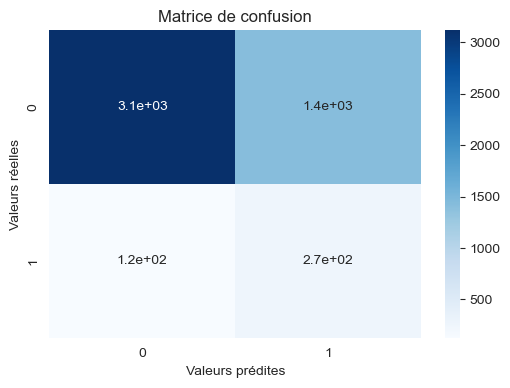

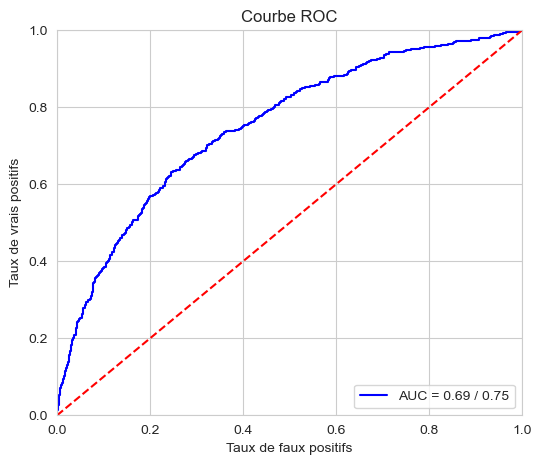

🏃 View run Modélisation initiale LogisticRegression at: http://127.0.0.1:5000/#/experiments/0/runs/e0d0446f592844fe81fd9261269f57b3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [33]:
with mlflow.start_run(run_name='Modélisation initiale LogisticRegression'):
    reg_log = LogisticRegression(max_iter=1000, random_state=SEED)
    reg_log.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(reg_log, X_val_scaled, y_val)
    data_metriques.append(("LogisticRegression", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Le score métier est nettement plus élevé.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

Le f-béta score est effectivement plus élevé que le f-score puisque le recall est plus élevé que la précision, ce score étant établit ici pour privilégier le recall à la précision. 

On constate que le score ROC AUC est amélioré par rapport à la baseline.

Score métier maximum : 0.40
Threshold optimal : 0.54


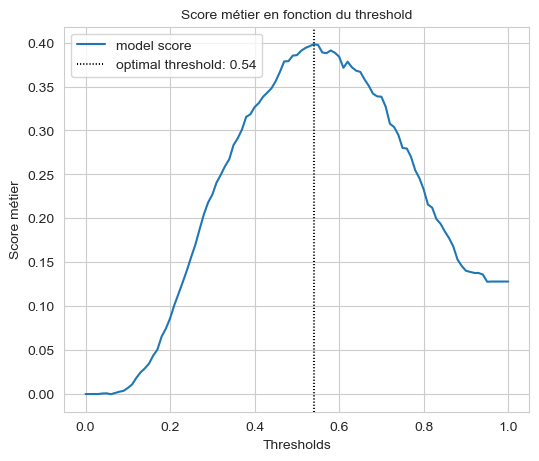

In [34]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Le score métier semble optimal quand le seuil est fixé à 0.59, cependant l'augmentation est minime.

**Modélisation initiale SVC (Support Vector Classifier) :**

Score métier :0.37
Accuracy score : 0.68
Precision score : 0.16
Recall score : 0.68
F1 score : 0.25
Fbeta score : 0.40
ROC AUC score : 0.68


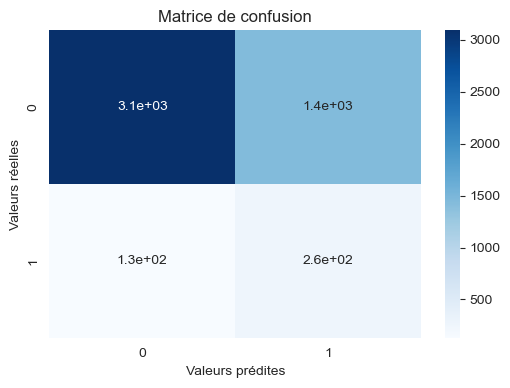

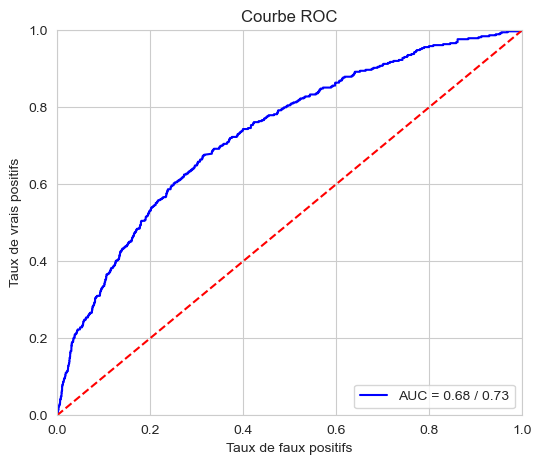

🏃 View run Modélisation initiale SVC at: http://127.0.0.1:5000/#/experiments/0/runs/2ec5e40cee2344fc959624c26f295412
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [35]:
with mlflow.start_run(run_name='Modélisation initiale SVC'):
    svc = SVC(random_state=SEED, probability=True)
    svc.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(svc, X_val_scaled, y_val)
    data_metriques.append(("SVC", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Le score métier est dégradé par rapport à la regression logistique.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

In [36]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.37
Threshold optimal : 0.5


**Modélisation initiale DecisionTreeClassifier :**

Score métier :0.19
Accuracy score : 0.59
Precision score : 0.10
Recall score : 0.56
F1 score : 0.18
Fbeta score : 0.30
ROC AUC score : 0.57


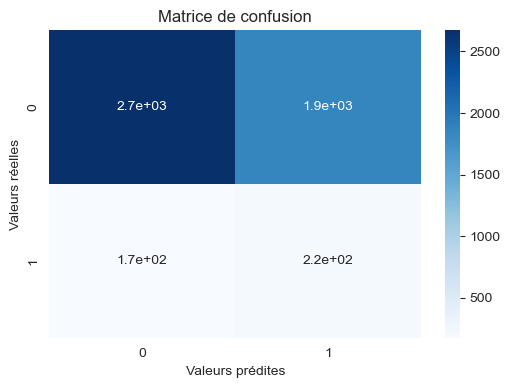

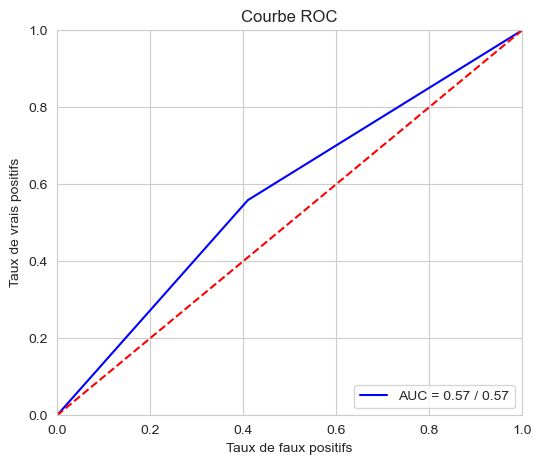

🏃 View run Modélisation initiale DecisionTreeClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/49c6bb9b303c43e7a3e18faf0798f7e4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [37]:
with mlflow.start_run(run_name='Modélisation initiale DecisionTreeClassifier'):
    tree = DecisionTreeClassifier(random_state=SEED)
    tree.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(tree, X_val_scaled, y_val)
    data_metriques.append(("DecisionTreeClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Le score métier est dégradé par rapport à la regression logistique, mais reste plus élevé que la baseline.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

Le f-béta score est effectivement plus élevé que le f-score puisque le recall est plus élevé que la précision, ce score étant établit ici pour privilégier le recall à la précision.

In [38]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.19
Threshold optimal : 0.0


On constate que peu importe le seuil, le score métier reste le même avec ce modèle.

**Modélisation initiale RandomForestClassifier :**

In [39]:
with mlflow.start_run(run_name='Modélisation initiale RandomForestClassifier'):
    rf = RandomForestClassifier(random_state=SEED)
    rf.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(rf, X_val_scaled, y_val)
    data_metriques.append(("RandomForestClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier :0.37
Accuracy score : 0.68
Precision score : 0.15
Recall score : 0.68
F1 score : 0.25
Fbeta score : 0.40
ROC AUC score : 0.68


🏃 View run Modélisation initiale RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/765a694f378f4e96b0c09cbde3804570
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


Le score métier est légèrement dégradé par rapport à la regression logistique.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

Le f-béta score est effectivement plus élevé que le f-score puisque le recall est plus élevé que la précision, ce score étant établit ici pour privilégier le recall à la précision. 

On constate que le score ROC AUC est amélioré par rapport à la baseline.

In [40]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.38
Threshold optimal : 0.53


Le score métier semble optimal quand le seuil est fixé à 0.5, cependant l'augmentation est minime.

**Modélisation initiale XGBClassifier :**

Score métier :0.35
Accuracy score : 0.65
Precision score : 0.15
Recall score : 0.69
F1 score : 0.24
Fbeta score : 0.39
ROC AUC score : 0.67


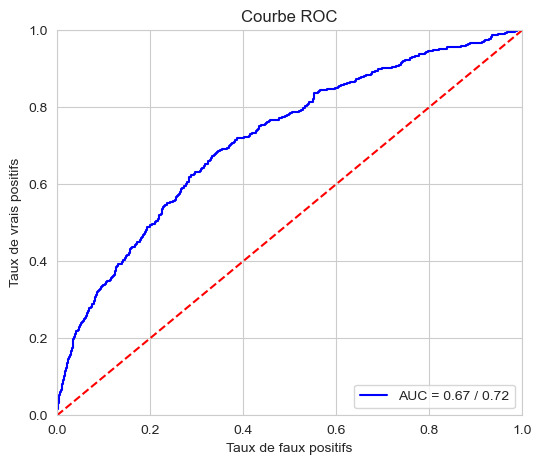

🏃 View run Modélisation initiale XGBClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/76d79de636364c4083f0b15a5cd17f7a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [41]:
with mlflow.start_run(run_name='Modélisation initiale XGBClassifier'):
    xgb = XGBClassifier(random_state=SEED)
    xgb.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(xgb, X_val_scaled, y_val)
    data_metriques.append(("XGBClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Le score métier est légèrement plus élevé par rapport à Random Forest.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

Le f-béta score est effectivement plus élevé que le f-score puisque le recall est plus élevé que la précision, ce score étant établit ici pour privilégier le recall à la précision. 

On constate que le score ROC AUC est amélioré par rapport à la baseline.

In [42]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.36
Threshold optimal : 0.52


Le score métier semble optimal quand le seuil est fixé à 0.56.

**Modélisation initiale LGBMClassifier :**

In [43]:
with mlflow.start_run(run_name='Modélisation initiale LGBMClassifier'):
    lgbm = LGBMClassifier(random_state=SEED)
    lgbm.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(lgbm, X_val_scaled, y_val)
    data_metriques.append(("LGBMClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

[LightGBM] [Info] Number of positive: 1952, number of negative: 1952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4782
[LightGBM] [Info] Number of data points in the train set: 3904, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Score métier :0.37
Accuracy score : 0.67
Precision score : 0.15
Recall score : 0.69
F1 score : 0.25
Fbeta score : 0.40
ROC AUC score : 0.68


🏃 View run Modélisation initiale LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/1c33bad911454f44ab991d569422ef6d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


Le score métier est légèrement plus élevé par rapport à XGBClassifier.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

Le f-béta score est effectivement plus élevé que le f-score puisque le recall est plus élevé que la précision, ce score étant établit ici pour privilégier le recall à la précision. 

On constate que le score ROC AUC est amélioré par rapport à la baseline.

In [44]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.38
Threshold optimal : 0.56


Pour le moment on peut constater que SVC et LGBMClassifier présentent le meilleur score métier. 

Les courbes du score métier en fonction du seuil ont été tracées et on constate que les meilleurs seuils se situent tous autour de 0.5 puisque le dataset que nous utilisons est équilibré.

**Bilan des modélisations :**

In [45]:
df_metriques = pd.DataFrame(data_metriques, columns=["Modele", "score_metier", "accuracy", "precision", "recall", "f1_score", "fbeta_score", "rocauc"])
df_metriques = df_metriques.sort_values(by="score_metier", ascending=False)
display(df_metriques)

Modele  score_metier  accuracy  precision    recall  \
1      LogisticRegression      0.385772  0.688211   0.159524  0.687179   
2                     SVC      0.372358  0.682114   0.155112  0.676923   
4  RandomForestClassifier      0.368293  0.678049   0.153310  0.676923   
6          LGBMClassifier      0.365650  0.666260   0.150279  0.689744   
5           XGBClassifier      0.351829  0.654268   0.145100  0.687179   
3  DecisionTreeClassifier      0.193293  0.587195   0.104959  0.558974   
0         DummyClassifier      0.128049  0.920732   0.000000  0.000000   

   f1_score  fbeta_score    rocauc  
1  0.258937     0.413580  0.687740  
2  0.252390     0.404660  0.679742  
4  0.250000     0.402194  0.677534  
6  0.246789     0.401493  0.676991  
5  0.239607     0.393308  0.669307  
3  0.176733     0.299698  0.574300  
0  0.000000     0.000000  0.500000

## <a id='toc4_3_'></a>[Optimisation des modèles](#toc0_)

Nous allons désormais optimiser nos modèles en testant différents hyperparamètres.

In [61]:
data_metriques = []

**scoring_grid_cv :**

In [62]:
scoring_grid_cv = metrics.make_scorer(fc_score_metier, greater_is_better=True)

**Modélisation optimisée LogisticRegression :**

In [48]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1e-5, 1e-2, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

with mlflow.start_run(run_name='GridSearchCV optimisé LogisticRegression'):
    reg_log = LogisticRegression(max_iter=1000, random_state=SEED)
    grid_reg_log = GridSearchCV(
        reg_log,
        param_grid=params,
        cv=5,
        scoring=scoring_grid_cv,
        return_train_score = True,
        n_jobs = -1
    )
    
    grid_reg_log.fit(X_train_scaled, y_train)

🏃 View run GridSearchCV optimisé LogisticRegression at: http://127.0.0.1:5000/#/experiments/0/runs/c52a4164929c464c8b12fcef5cdc52fa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [49]:
result_reg_log = pd.DataFrame(grid_reg_log.cv_results_)

In [50]:
print('Meilleurs paramètres',grid_reg_log.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_reg_log.loc[result_reg_log['params'] == grid_reg_log.best_params_])

Meilleurs paramètres {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
5       0.012423      0.002985         0.003149        0.001859  0.00001   

  param_penalty param_solver  \
5            l2    liblinear   

                                                 params  split0_test_score  \
5  {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}          -0.658131   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5          -0.815621          -0.746479          -0.911652          -0.834615   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
5          -0.7933        0.085645                1           -0.834774   

   split1_train_score  split2_train_score  split3_train_score  \
5           -0.747038           -0.784182           -0.735191   

   split4_train_score  mean_train_score  std_train_score  
5           -0.746479         -0.769533         0.036573

In [51]:
fc_plot_learning_curve(grid_reg_log.best_estimator_, X_train_scaled, y_train)

Score métier :0.29
Accuracy score : 0.50
Precision score : 0.12
Recall score : 0.81
F1 score : 0.21
Fbeta score : 0.37
ROC AUC score : 0.64


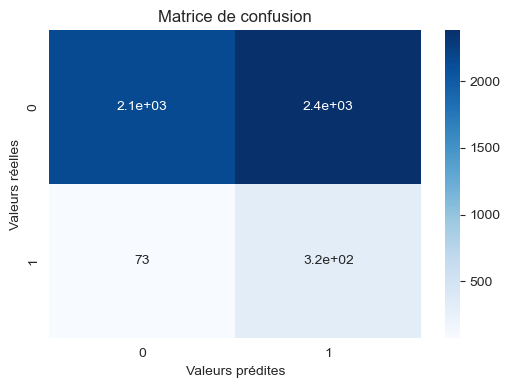

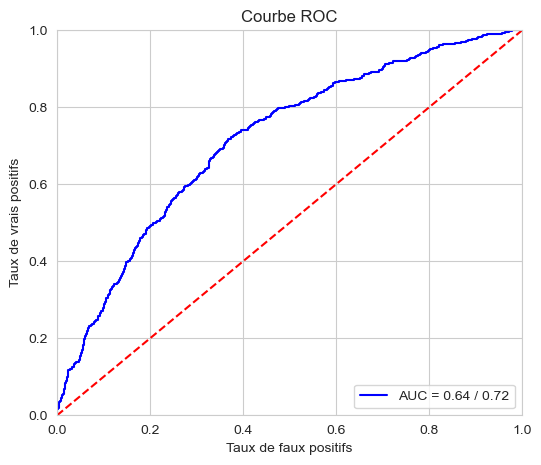

🏃 View run Modélisation optimisée LogisticRegression at: http://127.0.0.1:5000/#/experiments/0/runs/e0cad9eec1744baa95b3923afbec5f10
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [52]:
with mlflow.start_run(run_name='Modélisation optimisée LogisticRegression'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(grid_reg_log, X_val_scaled, y_val)
    data_metriques.append(("LogisticRegression", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.29
Threshold optimal : 0.5


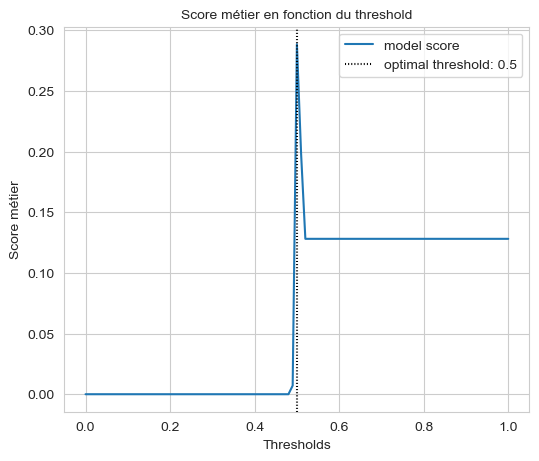

In [53]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Après optimisation des hyperparamètres, nous obtenons un score métier à 0.38, ce qui ne change presque pas par rapport au modèle de base. Les hyperparamètres optimaux ne semblent pas avoir d'impact significatifs sur les performances de notre modèle.

**Modélisation optimisée SVC (Support Vector Machine) :**

In [54]:
# Trop long

In [55]:
# params = {
#     'C': [1e-3, 1, 10],
#     'kernel': ['linear', 'rbf']
# }

# with mlflow.start_run(run_name='GridSearchCV optimisé SVC'):
#     svc = SVC(random_state=SEED, probability=True)
#     grid_svc = GridSearchCV(
#         svc,
#         param_grid=params,
#         cv=5,
#         scoring=scoring_grid_cv,
#         return_train_score = True,
#         n_jobs = -1
#     )
    
#     grid_svc.fit(X_train_scaled, y_train)

In [56]:
# result_svc = pd.DataFrame(grid_svc.cv_results_)

In [57]:
# print('Meilleurs paramètres',grid_svc.best_params_)
# print("Résultats des meilleurs paramètres :\n")
# display(result_svc.loc[result_svc['params'] == grid_svc.best_params_])

In [58]:
# fc_plot_learning_curve(grid_svc.best_estimator_, X_train_scaled, y_train)

In [59]:
# with mlflow.start_run(run_name='Modélisation optimisée SVC'):
#     # Calcul et enregistrement des metriques sur les données de validation
#     score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
#     fc_eval_score(grid_svc, X_val_scaled, y_val)
#     data_metriques.append(("SVC", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
#     mlflow.log_metric("val_score_métier", score_metier)
#     mlflow.log_metric("val_accuracy", accuracy)
#     mlflow.log_metric("val_precision", precision)
#     mlflow.log_metric("val_recall", recall)
#     mlflow.log_metric("val_f1_score", f1_score)
#     mlflow.log_metric("val_fbeta_score", fbeta_score)
#     mlflow.log_metric("val_rocauc", rocauc)

In [60]:
# fc_score_metier_max(y_pred_proba, y_val, verbose=True)

**Modélisation optimisée DecisionTreeClassifier :**

In [61]:
params =  {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10, None]
}


with mlflow.start_run(run_name='GridSearchCV optimisé DecisionTreeClassifier'):
    tree = DecisionTreeClassifier(random_state=SEED)
    grid_tree = GridSearchCV(
        tree,
        param_grid=params,
        cv=5,
        scoring=scoring_grid_cv,
        return_train_score = True,
        n_jobs = -1
    )
    
    grid_tree.fit(X_train_scaled, y_train)

🏃 View run GridSearchCV optimisé DecisionTreeClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/f6875c689b8d468fa74a7eb6215bb6ae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [62]:
result_tree = pd.DataFrame(grid_tree.cv_results_)

In [63]:
print('Meilleurs paramètres',grid_tree.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_tree.loc[result_tree['params'] == grid_tree.best_params_])

Meilleurs paramètres {'criterion': 'gini', 'max_depth': 5}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.043055      0.003641         0.002313        0.000396   

  param_criterion param_max_depth                                 params  \
1            gini               5  {'criterion': 'gini', 'max_depth': 5}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
1          -1.270166           -1.28169          -0.979513          -1.396927   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
1          -1.794872        -1.344634         0.26392                1   

   split0_train_score  split1_train_score  split2_train_score  \
1           -0.962536            -0.87576           -0.833493   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
1           -0.907141           -1.328745         -0.981535         0.178636

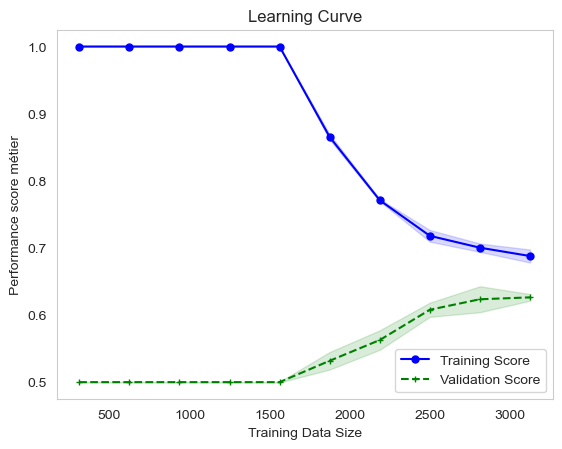

In [64]:
fc_plot_learning_curve(grid_tree.best_estimator_, X_train_scaled, y_train)

Score métier :0.27
Accuracy score : 0.57
Precision score : 0.12
Recall score : 0.70
F1 score : 0.20
Fbeta score : 0.36
ROC AUC score : 0.63


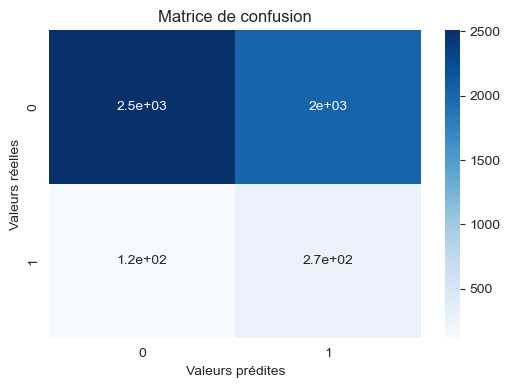

🏃 View run Modélisation optimisée DecisionTreeClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/3ea5cc6e361844bc99b8605af55a3090
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [65]:
with mlflow.start_run(run_name='Modélisation optimisée DecisionTreeClassifier'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(grid_tree, X_val_scaled, y_val)
    data_metriques.append(("DecisionTreeClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

In [66]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.30
Threshold optimal : 0.63


Après optimisation des hyperparamètres, nous obtenons un score métier plus élevé que celui du modèle de base.

**Modélisation optimisée RandomForestClassifier :**

In [67]:
params = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [2, 5, 10, None]
}

with mlflow.start_run(run_name='GridSearchCV optimisé RandomForestClassifier'):
    rand_fo = RandomForestClassifier(random_state=SEED)
    grid_rand_fo = GridSearchCV(
        rand_fo,
        param_grid=params,
        cv=5,
        scoring=scoring_grid_cv,
        return_train_score = True,
        n_jobs = -1)
    
    grid_rand_fo.fit(X_train_scaled, y_train)

🏃 View run GridSearchCV optimisé RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/c76e26ef4dd843cbaf61165741b61894
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [68]:
result_rand_fo = pd.DataFrame(grid_rand_fo.cv_results_)
result_rand_fo.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.399860      0.009149         0.015957        0.000805   
1       2.245913      0.028221         0.055073        0.007952   
2       4.658986      0.122727         0.095786        0.019087   
3      10.308114      0.760229         0.208082        0.010535   
4       0.772945      0.044602         0.016735        0.002233   

  param_max_depth  param_n_estimators                                  params  \
0               2                 100   {'max_depth': 2, 'n_estimators': 100}   
1               2                 500   {'max_depth': 2, 'n_estimators': 500}   
2               2                1000  {'max_depth': 2, 'n_estimators': 1000}   
3               2                2000  {'max_depth': 2, 'n_estimators': 2000}   
4               5                 100   {'max_depth': 5, 'n_estimators': 100}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -1.233035          -1.500640          -1.259923          -1.444302   
1          -1.180538          -1.400768          -1.276569          -1.453265   
2          -1.181818          -1.412292          -1.233035          -1.477593   
3          -1.194622          -1.372599          -1.183099          -1.427657   
4          -1.217670          -1.302177          -1.104994          -1.419974   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -1.485897        -1.384760        0.114723               15   
1          -1.579487        -1.378125        0.138607               13   
2          -1.592308        -1.379409        0.152653               14   
3          -1.552564        -1.346108        0.141065                9   
4          -1.521795        -1.313322        0.146636                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -1.233429           -1.282101           -1.281780   
1           -1.261928           -1.213897           -1.239513   
2           -1.260006           -1.190842           -1.249760   
3           -1.266731           -1.192123           -1.252962   
4           -0.964457           -0.931476           -0.892091   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -1.176433           -1.219270         -1.238603         0.040055  
1           -1.202690           -1.229193         -1.229444         0.020563  
2           -1.213256           -1.233675         -1.229508         0.024967  
3           -1.197887           -1.231754         -1.228291         0.029431  
4           -0.874480           -0.886044         -0.909710         0.033415

In [69]:
print('Meilleurs paramètres',grid_rand_fo.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_rand_fo.loc[result_rand_fo['params'] == grid_rand_fo.best_params_])

Meilleurs paramètres {'max_depth': 10, 'n_estimators': 2000}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11      22.123403      0.639642          0.22976        0.042406   

   param_max_depth  param_n_estimators  \
11              10                2000   

                                     params  split0_test_score  \
11  {'max_depth': 10, 'n_estimators': 2000}          -1.128041   

    split1_test_score  split2_test_score  split3_test_score  \
11           -1.28169           -1.15749          -1.339309   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
11          -1.475641        -1.276434        0.126358                1   

    split0_train_score  split1_train_score  split2_train_score  \
11            0.287864            0.267051            0.267051   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
11            0.244637            0.259603          0.265241         0.013962

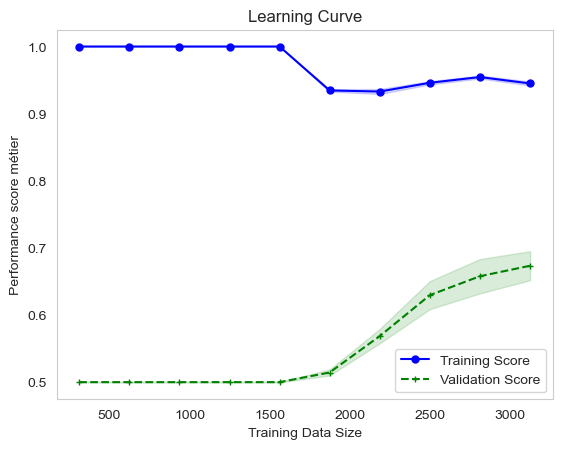

In [70]:
fc_plot_learning_curve(grid_rand_fo.best_estimator_, X_train_scaled, y_train)

Score métier :0.37
Accuracy score : 0.67
Precision score : 0.15
Recall score : 0.69
F1 score : 0.25
Fbeta score : 0.41
ROC AUC score : 0.68


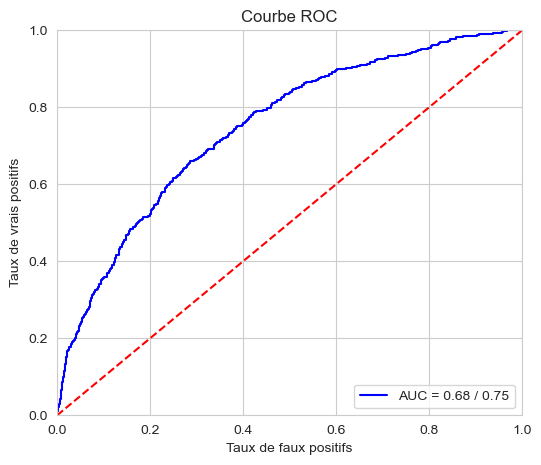

🏃 View run Modélisation optimisée RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/dba7e49457ed4e1687b73339b14c1b58
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [71]:
with mlflow.start_run(run_name='Modélisation optimisée RandomForestClassifier'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(grid_rand_fo, X_val_scaled, y_val)
    data_metriques.append(("RandomForestClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.39
Threshold optimal : 0.52


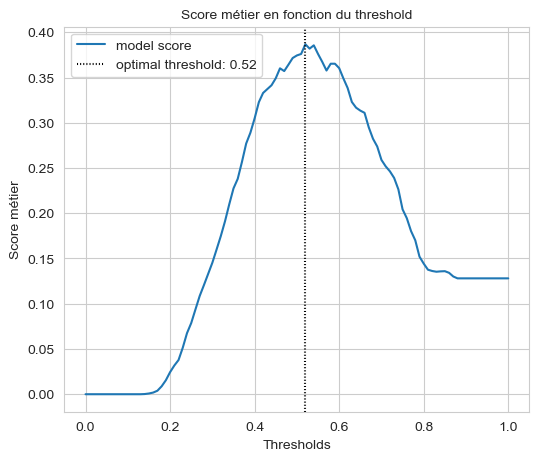

In [72]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Après optimisation des hyperparamètres, nous obtenons un score métier légèrement plus élevé que celui du modèle de base.

**Modélisation optimisée XGBClassifier :**

In [ ]:
params = {
    'gamma': [0, 0.1, 0.5, 1],
    'max_depth': [2,4,6],
    'min_child_weight': [1,5,10],
    'n_estimators': [100, 300, 500],
}

with mlflow.start_run(run_name='GridSearchCV optimisé XGBClassifier'):
    xgb = XGBClassifier(random_state=SEED)
    grid_xgb = GridSearchCV(
        xgb,
        param_grid=params,
        cv=5,
        scoring=scoring_grid_cv,
        return_train_score = True,
        n_jobs = -1)
    
    grid_xgb.fit(X_train_scaled, y_train)

In [ ]:
result_xgb = pd.DataFrame(grid_xgb.cv_results_)
result_xgb.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_gamma  \
0       4.145908      1.491354         0.049686        0.004975          0.0   
1      11.892777      0.720849         0.047323        0.008699          0.0   
2      19.515944      0.699990         0.036954        0.006995          0.0   
3       5.866736      0.480376         0.051112        0.007821          0.0   
4      13.338710      0.031594         0.042420        0.007312          0.0   

   param_max_depth  param_min_child_weight  param_n_estimators  \
0                2                       1                 100   
1                2                       1                 300   
2                2                       1                 500   
3                2                       5                 100   
4                2                       5                 300   

                                                                     params  \
0  {'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}   
1  {'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300}   
2  {'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 500}   
3  {'gamma': 0, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100}   
4  {'gamma': 0, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 300}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -1.281690          -1.377721          -1.125480          -1.468630   
1          -1.276569          -1.524968          -1.181818          -1.568502   
2          -1.258643          -1.576184          -1.266325          -1.563380   
3          -1.426376          -1.444302          -1.157490          -1.457106   
4          -1.460948          -1.563380          -1.238156          -1.505762   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -1.478205        -1.346345        0.131367                1   
1          -1.555128        -1.421397        0.160390               42   
2          -1.608974        -1.454701        0.157667               68   
3          -1.479487        -1.392952        0.118996               18   
4          -1.460256        -1.445700        0.110431               56   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.588216           -0.490234           -0.594300   
1            0.116875            0.107909            0.169709   
2            0.363433            0.398975            0.419148   
3           -0.568044           -0.494396           -0.573167   
4            0.143452            0.137048            0.110150   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.495997           -0.494878         -0.532725         0.047870  
1            0.144092            0.160691          0.139855         0.024050  
2            0.406340            0.414213          0.400422         0.019729  
3           -0.485751           -0.486236         -0.521519         0.040229  
4            0.124880            0.146287          0.132363         0.013328

In [ ]:
print('Meilleurs paramètres',grid_xgb.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_xgb.loc[result_xgb['params'] == grid_xgb.best_params_])

Meilleurs paramètres {'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_gamma  \
0       4.145908      1.491354         0.049686        0.004975          0.0   

   param_max_depth  param_min_child_weight  param_n_estimators  \
0                2                       1                 100   

                                                                     params  \
0  {'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           -1.28169          -1.377721           -1.12548           -1.46863   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -1.478205        -1.346345        0.131367                1   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.588216           -0.490234             -0.5943   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.495997           -0.494878         -0.532725          0.04787

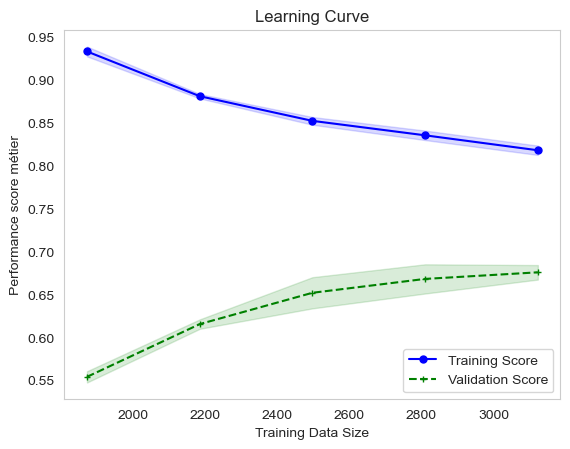

In [ ]:
fc_plot_learning_curve(grid_xgb.best_estimator_, X_train_scaled, y_train)

Score métier :0.39
Accuracy score : 0.69
Precision score : 0.16
Recall score : 0.68
F1 score : 0.26
Fbeta score : 0.41
ROC AUC score : 0.69


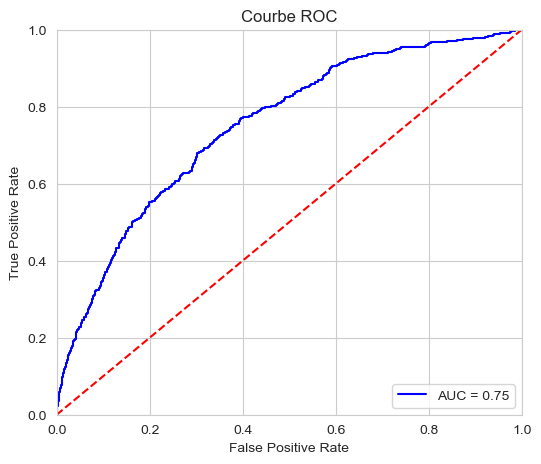

🏃 View run Modélisation optimisée XGBClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/058d5f5dd66044a8a6eb84c9747d00ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [ ]:
with mlflow.start_run(run_name='Modélisation optimisée XGBClassifier'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(grid_xgb, X_val_scaled, y_val)
    data_metriques.append(("XGBClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

In [ ]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.39
Threshold optimal : 0.5


Après optimisation des hyperparamètres, nous obtenons un score métier qui est plus élevé que celui du modèle de base.

**Modélisation optimisée LGBMClassifier :**

In [63]:
params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [-1, 2, 5],
    'num_leaves': [15, 31, 63]
}

with mlflow.start_run(run_name='GridSearchCV optimisé LGBMClassifier'):
    lgbm = LGBMClassifier(random_state=SEED)
    grid_lgbm = GridSearchCV(
        lgbm,
        param_grid=params,
        cv=5,
        scoring=scoring_grid_cv,
        return_train_score = True,
        n_jobs = -1
    )
    
    grid_lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 1952, number of negative: 1952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4782
[LightGBM] [Info] Number of data points in the train set: 3904, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🏃 View run GridSearchCV optimisé LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/cc2ce34b1b654384bd2ce84f08859cc4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [ ]:
result_lgbm = pd.DataFrame(grid_lgbm.cv_results_)
result_lgbm.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.603733      0.446332         0.011515        0.002259   
1      12.972892      0.533323         0.011783        0.003539   
2      24.123741      0.509421         0.007089        0.004037   
3      17.067583      0.646971         0.007704        0.003438   
4      34.500563      2.389740         0.008288        0.003724   

   param_max_depth  param_n_estimators  param_num_leaves  \
0               -1                 100                15   
1               -1                 100                31   
2               -1                 100                63   
3               -1                 300                15   
4               -1                 300                31   

                                                     params  \
0  {'max_depth': -1, 'n_estimators': 100, 'num_leaves': 15}   
1  {'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}   
2  {'max_depth': -1, 'n_estimators': 100, 'num_leaves': 63}   
3  {'max_depth': -1, 'n_estimators': 300, 'num_leaves': 15}   
4  {'max_depth': -1, 'n_estimators': 300, 'num_leaves': 31}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -1.371319          -1.404609          -1.137004          -1.441741   
1          -1.245839          -1.385403          -1.035851          -1.537772   
2          -1.338028          -1.412292          -1.090909          -1.467350   
3          -1.414853          -1.398207          -1.190781          -1.464789   
4          -1.398207          -1.513444          -1.142125          -1.516005   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -1.479487        -1.366832        0.120475               11   
1          -1.479487        -1.336871        0.179975                7   
2          -1.658974        -1.393511        0.184890               17   
3          -1.576923        -1.409111        0.125762               22   
4          -1.497436        -1.413444        0.142421               23   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.193404            0.218060            0.200128   
1            0.495677            0.492475            0.493436   
2            0.499840            0.499840            0.500160   
3            0.499840            0.496638            0.496958   
4            0.499840            0.499840            0.500160   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.178034            0.177977          0.193520         0.015015  
1            0.493116            0.492958          0.493532         0.001116  
2            0.500160            0.500000          0.500000         0.000143  
3            0.496638            0.496799          0.497375         0.001238  
4            0.500160            0.500000          0.500000         0.000143

In [ ]:
print('Meilleurs paramètres',grid_lgbm.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_lgbm.loc[result_lgbm['params'] == grid_lgbm.best_params_])

Meilleurs paramètres {'max_depth': 2, 'n_estimators': 300, 'num_leaves': 15}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12       3.765586      0.043291         0.009618        0.003689   

    param_max_depth  param_n_estimators  param_num_leaves  \
12                2                 300                15   

                                                     params  \
12  {'max_depth': 2, 'n_estimators': 300, 'num_leaves': 15}   

    split0_test_score  split1_test_score  split2_test_score  \
12          -1.308579          -1.330346          -1.058899   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
12           -1.50064          -1.362821        -1.312257        0.143231   

    rank_test_score  split0_train_score  split1_train_score  \
12                1           -0.486071            -0.39001   

    split2_train_score  split3_train_score  split4_train_score  \
12           -0.498239           -0.445725           -0.464469   

    mean_train_score  std_train_score  
12         -0.456903          0.03799

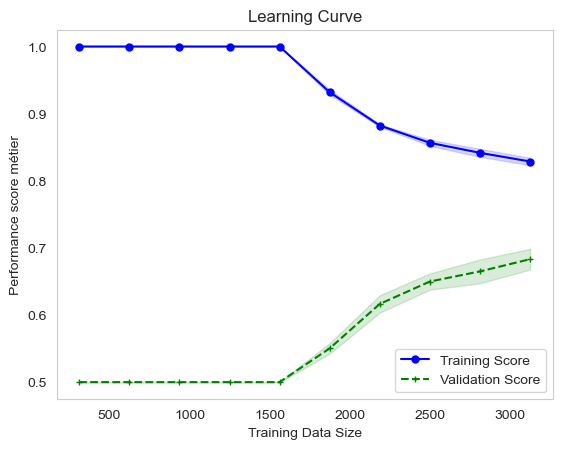

In [ ]:
fc_plot_learning_curve(grid_lgbm.best_estimator_, X_train_scaled, y_train)

In [ ]:
with mlflow.start_run(run_name='Modélisation optimisée LGBMClassifier'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(grid_lgbm, X_val_scaled, y_val)
    data_metriques.append(("LGBMClassifier", score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc))
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier :0.39
Accuracy score : 0.70
Precision score : 0.16
Recall score : 0.68
F1 score : 0.26
Fbeta score : 0.42
ROC AUC score : 0.69


🏃 View run Modélisation optimisée LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/88d7e24b5a4c4f618ee7f92a2845db08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [ ]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

Score métier maximum : 0.40
Threshold optimal : 0.49


Après optimisation des hyperparamètres, nous obtenons un score métier supérieur au modèle de base. Les hyperparamètres optimaux semblent avoir un léger impact sur les performances de notre modèle.

**Bilan des modélisations :**

In [ ]:
df_metriques = pd.DataFrame(data_metriques, columns=["Modele", "score_metier", "accuracy", "precision", "recall", "f1_score", "fbeta_score", "rocauc"])
df_metriques = df_metriques.sort_values(by="score_metier", ascending=False)
display(df_metriques)

Modele  score_metier  accuracy  precision    recall  \
0      LogisticRegression      0.403252  0.685569   0.162682  0.715385   
4          LGBMClassifier      0.391260  0.697358   0.163090  0.682051   
3           XGBClassifier      0.385366  0.691463   0.160241  0.682051   
2  RandomForestClassifier      0.347154  0.666057   0.146245  0.664103   
1  DecisionTreeClassifier      0.264837  0.611179   0.121333  0.625641   

   f1_score  fbeta_score    rocauc  
0  0.265083     0.425954  0.699193  
4  0.263236     0.416797  0.690363  
3  0.259512     0.413043  0.687163  
2  0.239704     0.388772  0.665164  
1  0.203249     0.341641  0.617787

## <a id='toc4_4_'></a>[Sélection du modèle final](#toc0_)

Le modèle LGBMClassifier avec les hyperparamètres suivants : *'max_depth': 2, 'n_estimators': 500, 'num_leaves': 15* est le modèle le plus performant.

**scoring_grid_cv :**

In [64]:
scoring_grid_cv = metrics.make_scorer(fc_score_metier, greater_is_better=True)

**mlflow autolog :**

In [65]:
mlflow.lightgbm.autolog(log_input_examples=True, silent=True)

**Recherche des hyperparamètres :**

Nous allons donc utiliser ce modèle par la suite. Nous décidons dans un premier temps de réaliser une grid search plus poussée avec l'algorithme LGBMClassifier afin de tenter d'obtenir de meilleures performances.

In [66]:
params = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [-1, 2, 5, 7],
    'num_leaves': [7, 15, 31, 63, 127],
    'learning_rate': [0.05, 0.1, 0.2, 0.4]
}

with mlflow.start_run(run_name='GridSearchCV final LGBMClassifier'):
    lgbm_fin = LGBMClassifier(random_state=SEED)
    grid_lgbm_fin = GridSearchCV(
        lgbm_fin,
        param_grid=params,
        cv=5,
        scoring=scoring_grid_cv,
        return_train_score = True,
        n_jobs = -1
    )
    
    grid_lgbm_fin.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 1952, number of negative: 1952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4782
[LightGBM] [Info] Number of data points in the train set: 3904, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

🏃 View run GridSearchCV final LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/915bb67f89074daba0fc3e42f04d763d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [67]:
result_lgbm_fin = pd.DataFrame(grid_lgbm_fin.cv_results_)
result_lgbm_fin.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.025885      0.330467         0.005423        0.000738   
1       5.383224      0.457263         0.005728        0.000673   
2       9.516681      0.393906         0.006063        0.000316   
3      16.662682      0.151081         0.006265        0.000593   
4      30.267914      1.673132         0.006789        0.000553   

   param_learning_rate  param_max_depth  param_n_estimators  param_num_leaves  \
0                 0.05               -1                 100                 7   
1                 0.05               -1                 100                15   
2                 0.05               -1                 100                31   
3                 0.05               -1                 100                63   
4                 0.05               -1                 100               127   

                                                                             params  \
0    {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 7}   
1   {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 15}   
2   {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}   
3   {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 63}   
4  {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 127}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -1.254802          -1.492958          -1.212548          -1.510883   
1          -1.198464          -1.517286          -1.280410          -1.404609   
2          -1.088348          -1.468630          -1.298335          -1.439181   
3          -1.230474          -1.606914          -1.249680          -1.425096   
4          -1.169014          -1.603073          -1.318822          -1.419974   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -1.462821        -1.386802        0.126675               60   
1          -1.453846        -1.370923        0.116076               26   
2          -1.541026        -1.367104        0.160116               14   
3          -1.693590        -1.441151        0.185745              135   
4          -1.666667        -1.435510        0.182422              129   

   split0_train_score  split1_train_score  split2_train_score  \
0           -1.010567           -1.039385           -1.024976   
1           -0.623439           -0.628882           -0.600064   
2            0.002562           -0.087096           -0.040346   
3            0.421069            0.438361            0.412744   
4            0.499840            0.496638            0.500160   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -1.039705           -1.012804         -1.025487         0.012482  
1           -0.587896           -0.595391         -0.607134         0.016105  
2           -0.008325           -0.042574         -0.035156         0.031376  
3            0.396734            0.402689          0.414319         0.014632  
4            0.500160            0.500000          0.499360         0.001366

In [68]:
print('Meilleurs paramètres',grid_lgbm_fin.best_params_)
print("Résultats des meilleurs paramètres :\n")
display(result_lgbm_fin.loc[result_lgbm_fin['params'] == grid_lgbm_fin.best_params_])

Meilleurs paramètres {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Résultats des meilleurs paramètres :



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
41       4.558409      0.222279         0.006228        0.001959   

    param_learning_rate  param_max_depth  param_n_estimators  \
41                 0.05                5                 100   

    param_num_leaves  \
41                15   

                                                                            params  \
41  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}   

    split0_test_score  split1_test_score  split2_test_score  \
41          -1.171575           -1.40589          -1.174136   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
41          -1.463508          -1.465385        -1.336099        0.134996   

    rank_test_score  split0_train_score  split1_train_score  \
41                1           -0.650656           -0.692603   

    split2_train_score  split3_train_score  split4_train_score  \
41           -0.707653            -0.68716           -0.643406   

    mean_train_score  std_train_score  
41         -0.676296         0.024925

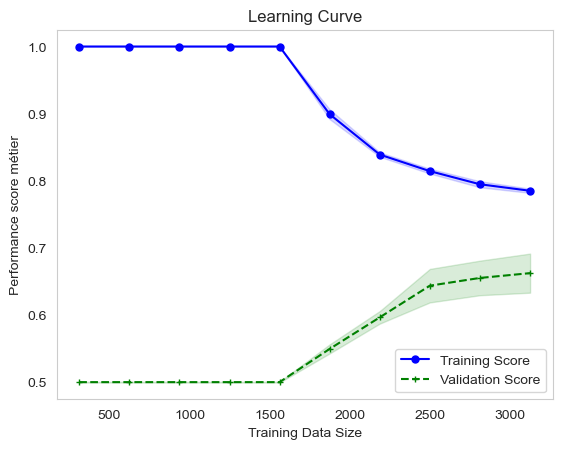

In [69]:
fc_plot_learning_curve(grid_lgbm_fin.best_estimator_, X_train_scaled, y_train)

La learning curve nous informe que les deux courbes se rapprochent lorsque l'échantillon augmente. Elles semblent se stabiliser à droite du graphique, lorsque l'échantillon arrive à son maximum. 

Score métier :0.37
Accuracy score : 0.68
Precision score : 0.15
Recall score : 0.66
F1 score : 0.25
Fbeta score : 0.40
ROC AUC score : 0.67


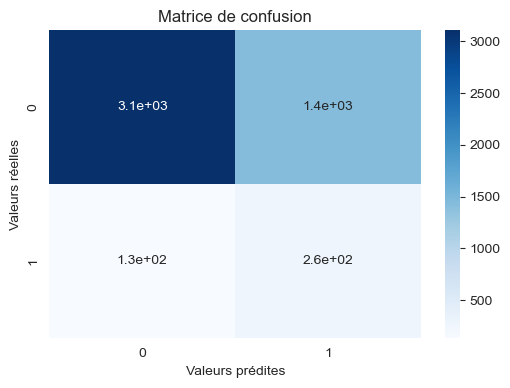

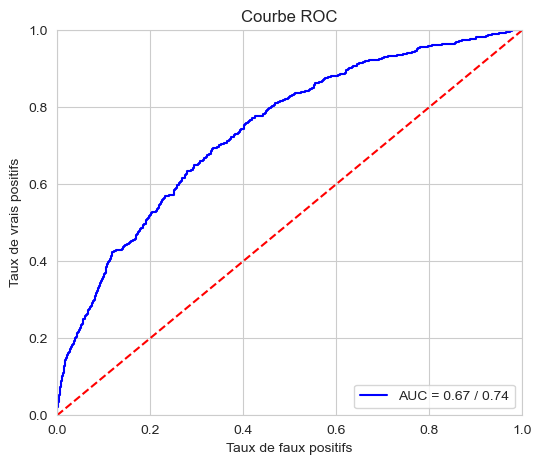

🏃 View run Modélisation finale LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/39ce157d9cb4461d8a28edb02f505557
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [70]:
with mlflow.start_run(run_name='Modélisation finale LGBMClassifier'):
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(grid_lgbm_fin, X_val_scaled, y_val)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Score métier maximum : 0.37
Threshold optimal : 0.51


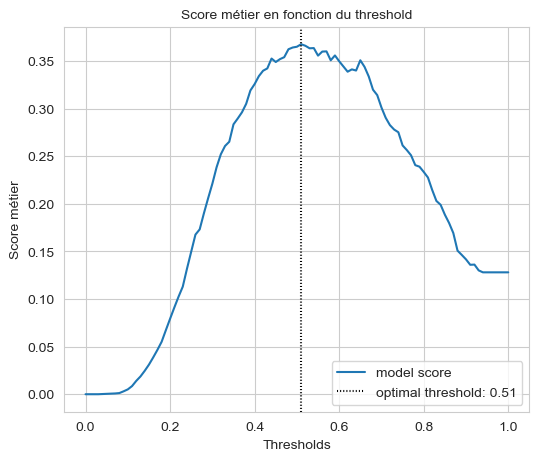

In [71]:
fc_score_metier_max(y_pred_proba, y_val, verbose=True)

## <a id='toc4_5_'></a>[Le modèle final](#toc0_)

Notre modèle final est donc un LGBMClassifier avec les paramètres *learning_rate=0.2, max_depth=2, n_estimators=300, num_leaves=7* et un seuil à 0.45.

**Modèle avec un dataset réduit :**

In [143]:
X = df_datas_train_reduit.drop(columns=['TARGET'])
y = df_datas_train_reduit['TARGET']
X_train, y_train, X_val, y_val, X_val_test, y_val_test, X_train_scaled, X_val_scaled, X_val_test_scaled = fc_data_scaled(path_models, X, y)

In [144]:
X_train_under, y_train_under = under.fit_resample(X_train_scaled, y_train)

In [145]:
X_train_scaled = X_train_under.copy()
y_train = y_train_under.copy()

[LightGBM] [Info] Number of positive: 1952, number of negative: 1952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5130
[LightGBM] [Info] Number of data points in the train set: 3904, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

Score métier :0.36
Accuracy score : 0.61
Precision score : 0.14
Recall score : 0.75
F1 score : 0.24
Fbeta score : 0.40
ROC AUC score : 0.68


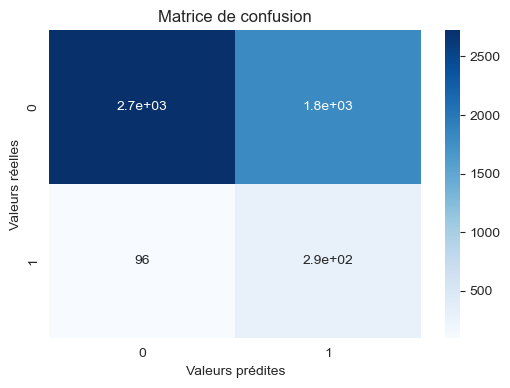

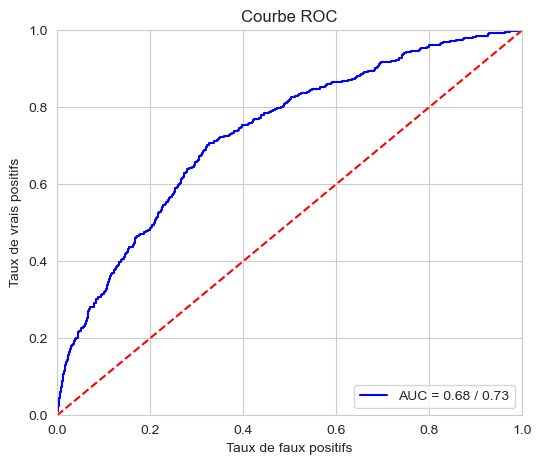

🏃 View run Modèle sélectionné LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/6f84c3257c244d349d0dfdb38737a8d7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [146]:
with mlflow.start_run(run_name='Modèle sélectionné LGBMClassifier'):
    lgbm_final = LGBMClassifier(learning_rate=0.2, max_depth=2, n_estimators=300, num_leaves=7, random_state=SEED)
    lgbm_final.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(lgbm_final, X_val_scaled, y_val, seuil=0.45)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**Modèle avec un dataset complet :**

In [147]:
X = df_datas_train.drop(columns=['TARGET'])
y = df_datas_train['TARGET']
X_train, y_train, X_val, y_val, X_val_test, y_val_test, X_train_scaled, X_val_scaled, X_val_test_scaled = fc_data_scaled(path_models, X, y)

In [148]:
X_train_under, y_train_under = under.fit_resample(X_train_scaled, y_train)

In [149]:
X_train_scaled = X_train_under.copy()
y_train = y_train_under.copy()

[LightGBM] [Info] Number of positive: 19860, number of negative: 19860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5623
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

Score métier :0.37
Accuracy score : 0.63
Precision score : 0.15
Recall score : 0.76
F1 score : 0.25
Fbeta score : 0.42
ROC AUC score : 0.69


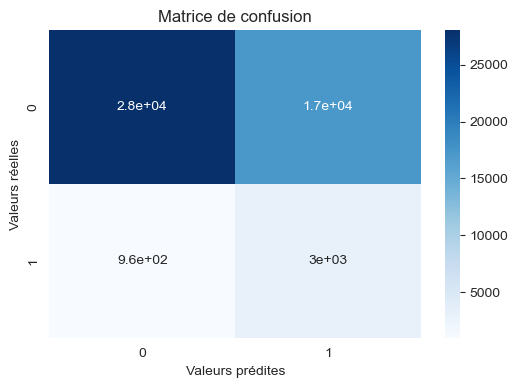

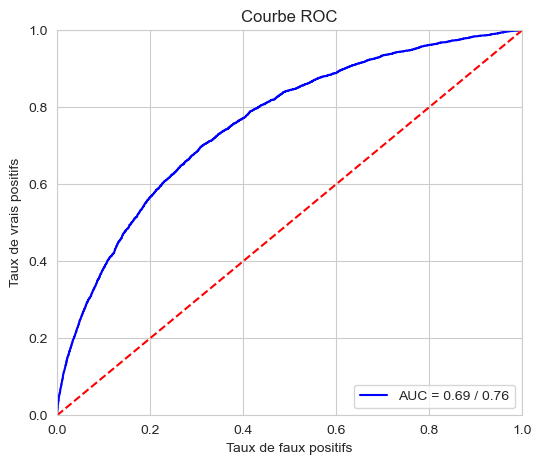

🏃 View run Modèle sélectionné LGBMClassifier at: http://127.0.0.1:5000/#/experiments/0/runs/7f51fe0a77404d7a946fd2be467ab75c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [150]:
with mlflow.start_run(run_name='Modèle sélectionné LGBMClassifier'):
    lgbm_final = LGBMClassifier(learning_rate=0.2, max_depth=2, n_estimators=300, num_leaves=7, random_state=SEED)
    lgbm_final.fit(X_train_scaled, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(lgbm_final, X_val_scaled, y_val, seuil=0.45)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

**Pipeline du modèle final :**

In [151]:
X = df_datas_train.drop(columns=['TARGET'])
y = df_datas_train['TARGET']
X_train, y_train, X_val, y_val, X_val_test, y_val_test, X_train_scaled, X_val_scaled, X_val_test_scaled = fc_data_scaled(path_models, X, y)

Nous intégrons un pipeline du modèle incluant une standardisation des données et un undersampling.

[LightGBM] [Info] Number of positive: 19860, number of negative: 19860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5637
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

Score métier :0.37
Accuracy score : 0.63
Precision score : 0.15
Recall score : 0.76
F1 score : 0.25
Fbeta score : 0.42
ROC AUC score : 0.69


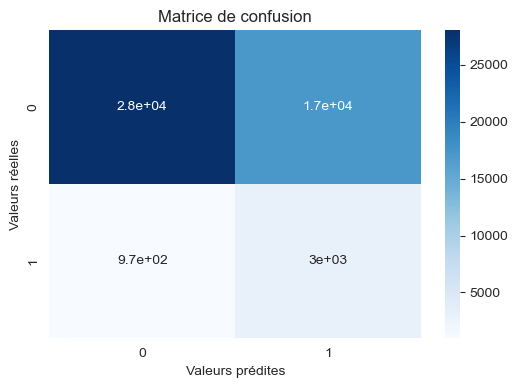

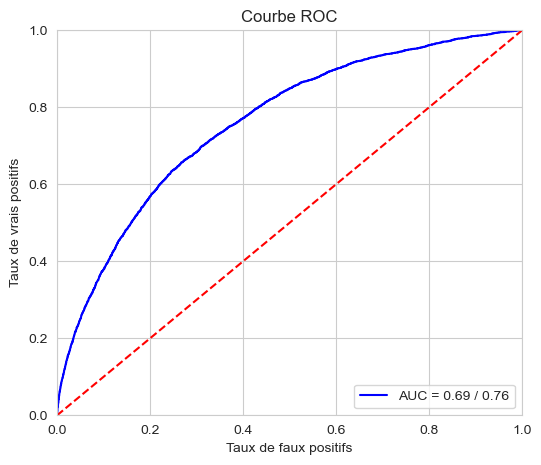

🏃 View run Pipeline final train at: http://127.0.0.1:5000/#/experiments/0/runs/f42ca247a81e4c4091b3b1c8fd2db07b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [152]:
cols = X_train.select_dtypes(['float64']).columns
preprocessor = ColumnTransformer(
    [('quanti', StandardScaler(), cols)],
    remainder='passthrough'
)

pipe = Pipeline(steps = [
    ['scaler', preprocessor],
    ['sampling',RandomUnderSampler()],
    ['classifier', LGBMClassifier(
        learning_rate=0.2,
        max_depth=2,
        n_estimators=300,
        num_leaves=7,
        random_state=SEED
    )]
])

with mlflow.start_run(run_name='Pipeline final train'):
    pipe.fit(X_train, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(pipe, X_val, y_val, seuil=0.45)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

Le score métier est de 0.41.

La matrice de confusion nous permet de constater que les FP sont présents en moins grande quantité que les autres catégories. Le modèle présente cependant une grande quantité de FN.

Le f-béta score est effectivement plus élevé que le f-score puisque le recall est plus élevé que la précision, ce score étant établit ici pour privilégier le recall à la précision.

On constate que le score ROC AUC est amélioré par rapport à la baseline et est de 0.71.

Score métier :0.37
Accuracy score : 0.63
Precision score : 0.15
Recall score : 0.76
F1 score : 0.25
Fbeta score : 0.42
ROC AUC score : 0.69


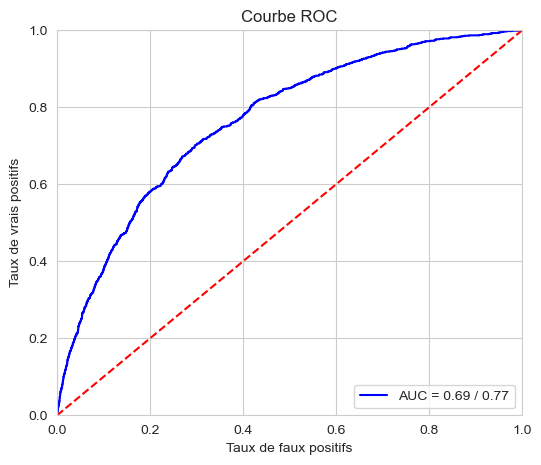

🏃 View run Pipeline final test at: http://127.0.0.1:5000/#/experiments/0/runs/52bc8c512d2f4d4aa267033af215c057
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [153]:
with mlflow.start_run(run_name='Pipeline final test'):
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(pipe, X_val_test, y_val_test, seuil=0.45)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

L'application du pipeline sur le jeu X_val_test nous donne des résultats similaires à ceux du jeu de validation X_val.

**Graphe des prédictions :**

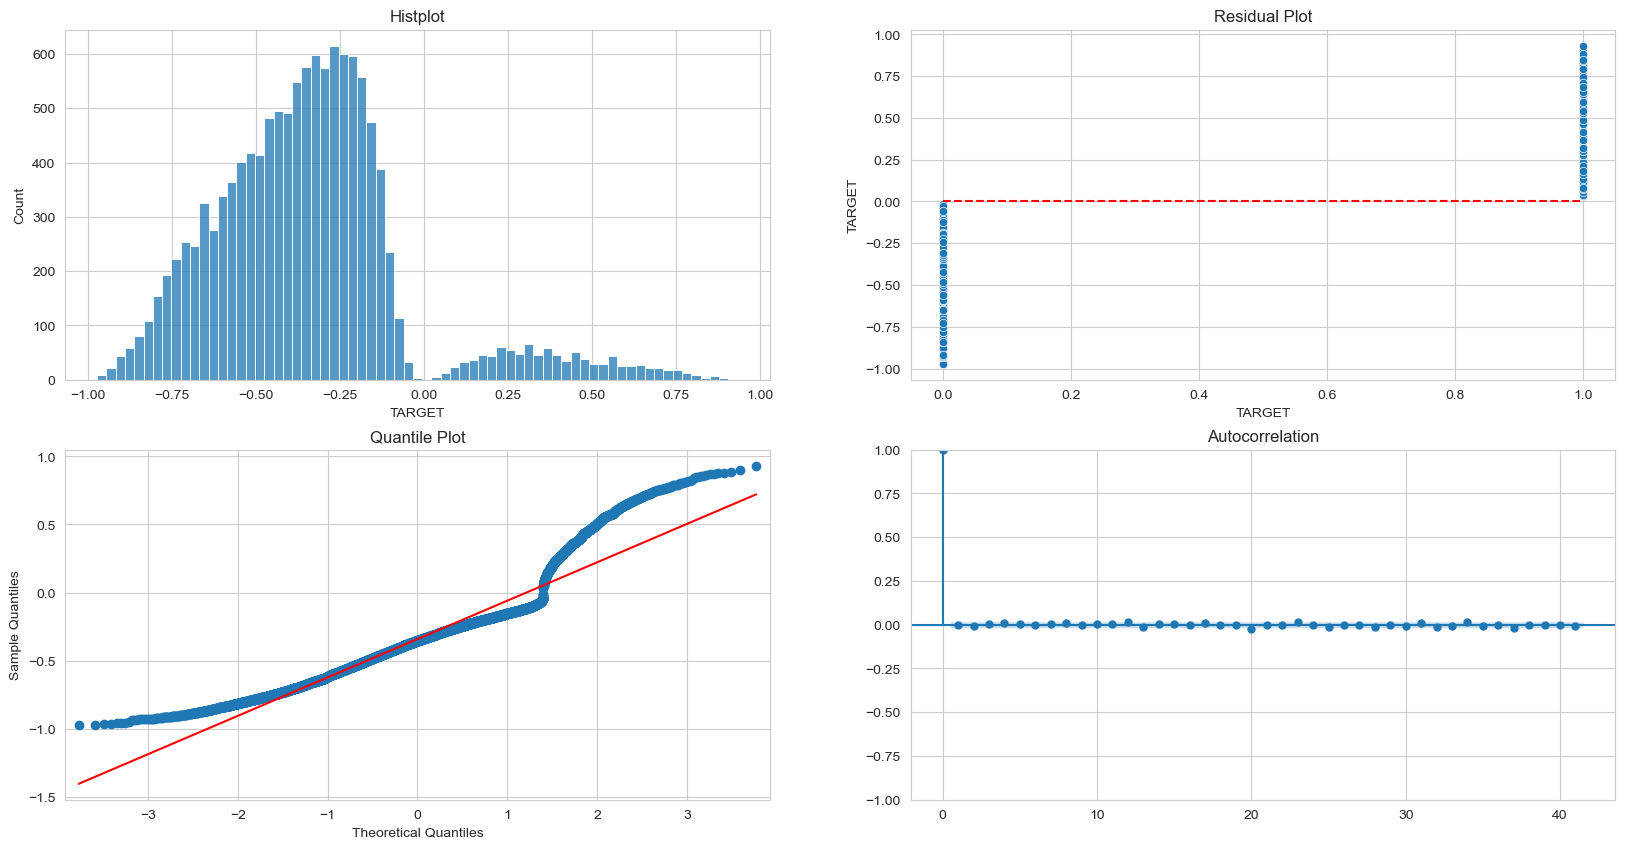

In [154]:
fc.fgraph_prediction(y_val_test, y_pred_proba)

# <a id='toc5_'></a>[Explicabilité](#toc0_)

Nous allons désormais expliquer notre modèle avec les valeurs de SHAP. 

SHAP (SHapley Additive exPlanations) est une approche théorique et pratique pour expliquer les prédictions des modèles d'apprentissage automatique. L'objectif de SHAP est de fournir des explications interprétables pour les prédictions de modèles complexes. Il permet de comprendre comment chaque feature contribue à la prédiction finale, en attribuant des valeurs d'importance à chacune.

SHAP permet de fournir à la fois des explications globales, qui s'appliquent à l'ensemble du modèle, et des explications locales, qui sont spécifiques à une prédiction individuelle.

In [155]:
tree_explainer = shap.TreeExplainer(pipe['classifier'], approximate=True)
shap_values_target = tree_explainer.shap_values(X_val_test)

**Explication globale :**

Nous commençons l'analyse d'importance, d'un point de vue global, avec les features les plus importantes pour un modèle basé sur un ensemble de validation. Ici, nous avons utilisé *summary_plot*. Ce type de tracé agrège les valeurs SHAP pour toutes les features et tous les échantillons de l'ensemble sélectionné. Ensuite, les valeurs SHAP sont triées, de sorte que la première affichée est la feature la plus importante. En plus de cela, nous recevons des informations sur la façon dont chaque feature affecte la sortie du modèle. Le graphique utilise les valeurs SHAP pour montrer la distribution des impacts de chaque feature sur la sortie du modèle.

In [156]:
shap_values_target

array([[-0.18258911, -0.37765671, -0.13336742, ..., -0.0289528 ,
         0.00137083,  0.06926492],
       [-0.18615401, -0.08423515, -0.14372699, ..., -0.0289528 ,
         0.00137083,  0.06926492],
       [-0.30507197, -0.40397972, -0.13561431, ..., -0.0289528 ,
         0.00137083, -0.13563273],
       ...,
       [-0.18379337, -0.42055813, -0.14315246, ..., -0.0289528 ,
         0.00137083, -0.13563273],
       [-0.18238439, -0.37401432, -0.14372699, ..., -0.0289528 ,
        -0.00298673,  0.06926492],
       [-0.31271832, -0.37138633, -0.14597388, ..., -0.0289528 ,
        -0.00298673, -0.14333338]])

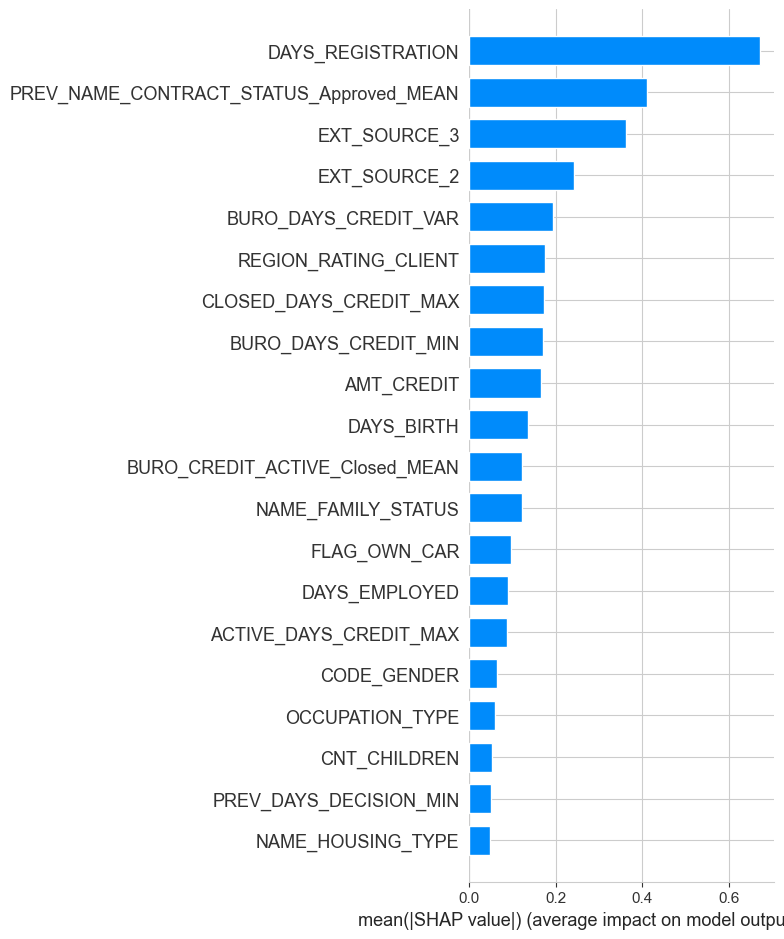

In [157]:
shap.summary_plot(shap_values_target, X_val_test, plot_type='bar')

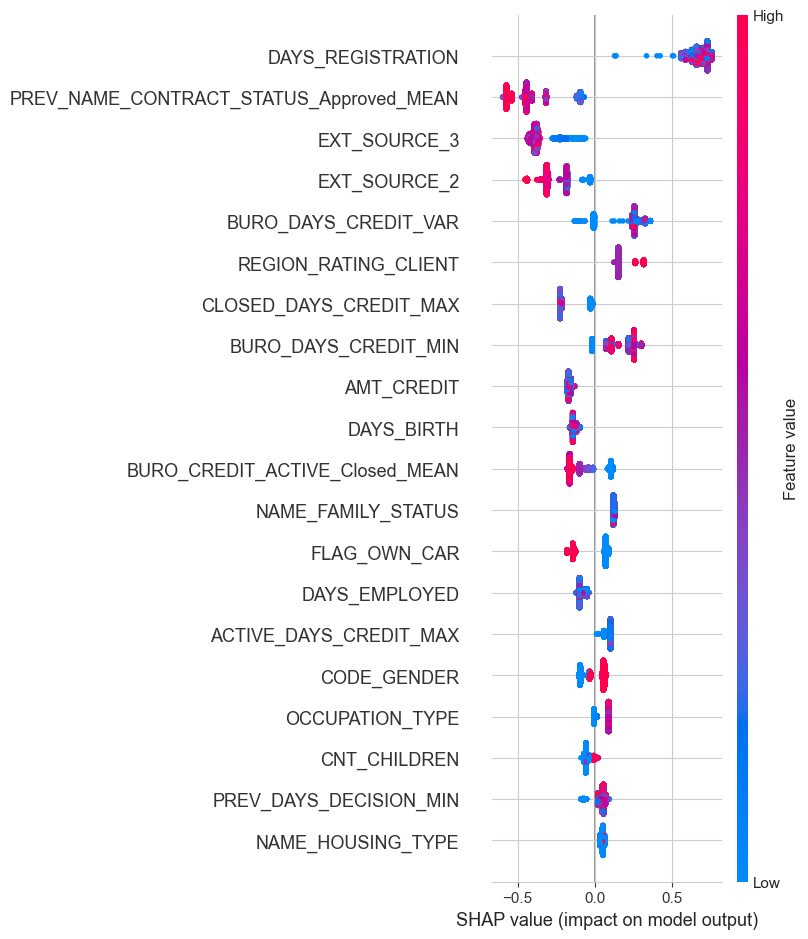

In [158]:
shap.summary_plot(shap_values_target, X_val_test.values, feature_names = X_val_test.columns)

**Explication locale :**

D'un point de vue local, on s'intéresse cette fois-ci à l'impact des features pour la décision du modèle par rapport à une observation en particulier.

Dans les graphes ci-dessous, on peut voir l’impact de chacune des caractéristiques de l’individu choisi et comment ces caractéristiques impactent la prédiction. En bleu sont représentées les caractéristiques ayant une SHAPley valeur négative et donc une contribution négative et en rouge les caractéristiques ayant une SHAPley valeur positive, donc une contribution positive.

In [159]:
df_y_val_test = pd.DataFrame(y_val_test)
df_X_val_test = X_val_test.copy()
df_X_val_test['TARGET'] = df_y_val_test['TARGET']

**Target = 0 :**

In [160]:
df_X_val_test_0 = df_X_val_test.loc[(df_X_val_test['TARGET'] == 0), :].iloc[:2]
df_X_val_test_0.head()

EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
SK_ID_CURR                                           
384492          0.470722      0.735221   42.863014   
231389          0.494131      0.156640   37.101370   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  \
SK_ID_CURR                                           
384492                                         0.0   
231389                                         0.2   

            BURO_CREDIT_ACTIVE_Closed_MEAN  BURO_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                         
384492                                 0.8                2287.0   
231389                                 0.4                2550.0   

            DAYS_EMPLOYED  REGION_RATING_CLIENT  \
SK_ID_CURR                                        
384492             4280.0                     2   
231389             4490.0                     2   

            PREV_NAME_PRODUCT_TYPE_walkin_MEAN  DAYS_EMPLOYED_PERC  \
SK_ID_CURR                                                           
384492                                     0.0            0.273570   
231389                                     0.2            0.331561   

            DAYS_LAST_PHONE_CHANGE  CODE_GENDER  NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                             
384492                        -0.0            1                  2.0   
231389                      1544.0            1                  2.0   

            BURO_DAYS_CREDIT_MAX  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                                  
384492                     630.0           4168.0                       0   
231389                      29.0           3561.0                       0   

            CLOSED_DAYS_CREDIT_MAX  BURO_CREDIT_ACTIVE_Active_MEAN  \
SK_ID_CURR                                                           
384492                      1215.0                             0.2   
231389                       388.0                             0.6   

            NAME_INCOME_TYPE  FLAG_EMP_PHONE  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                                                             
384492                   5.0               1                       0   
231389                   8.0               1                       0   

            FLAG_DOCUMENT_3  ACTIVE_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_VAR  \
SK_ID_CURR                                                                  
384492                    1                   630.0         395519.500000   
231389                    0                    29.0         616130.444444   

            DAYS_REGISTRATION  CLOSED_DAYS_CREDIT_VAR  \
SK_ID_CURR                                              
384492                 5684.0           215598.916667   
231389                 2445.0           371000.250000   

            PREV_NAME_CONTRACT_STATUS_Approved_MEAN  PREV_DAYS_DECISION_MIN  \
SK_ID_CURR                                                                    
384492                                          1.0                  2563.0   
231389                                          0.6                  1544.0   

            OCCUPATION_TYPE  HOUSETYPE_MODE_blockofflats  CNT_CHILDREN  \
SK_ID_CURR                                                               
384492                  4.0                            0             1   
231389                  0.0                            1             0   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
384492              157500.0    187704.0      10611.0         148500.0   
231389              103500.0    135000.0       6750.0         135000.0   

            NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  NAME_TYPE_SUITE  \
SK_ID_CURR                                                           
384492                     2.0                2.0             

In [161]:
i = -1
for index, row in df_X_val_test.iterrows():
    i += 1
    if (row['TARGET'] == 0):
        print(f"{i} : {index}")

0 : 384492
1 : 231389
2 : 147302
3 : 272197
4 : 437428
5 : 413258
6 : 151762
7 : 180288
8 : 367596
9 : 418803
10 : 398611
11 : 271396
12 : 451205
14 : 208340
15 : 439058
16 : 338667
17 : 180282
18 : 198144
19 : 218408
20 : 285670
21 : 174708
22 : 144142
23 : 427367
24 : 277949
25 : 193339
26 : 340301
27 : 231207
28 : 325484
29 : 113924
30 : 231989
31 : 187650
32 : 194587
33 : 229136
34 : 126218
35 : 391308
37 : 145513
38 : 437731
39 : 447513
40 : 125632
41 : 330706
42 : 279504
43 : 310190
44 : 212568
46 : 319427
47 : 259870
48 : 414620
50 : 123593
51 : 163107
52 : 179324
53 : 418941
54 : 217514
55 : 311548
56 : 353040
57 : 411598
58 : 383708
59 : 405817
60 : 293168
61 : 405131
62 : 327098
63 : 386620
64 : 217274
65 : 434171
66 : 440294
67 : 427855
68 : 379093
70 : 315632
71 : 411276
72 : 446473
73 : 342996
74 : 127675
76 : 264111
77 : 228311
78 : 253836
79 : 446386
80 : 251585
81 : 225137
83 : 392445
84 : 432579
85 : 107307
86 : 450382
87 : 409138
88 : 182506
89 : 159575
90 : 354701
91

- Target = 0 : Individu ID = 384492 (id = 0)

In [162]:
id = 0

In [163]:
shap.initjs()
print("Individu ID: {}".format(X_val_test.index[id]))
shap.force_plot(
    tree_explainer.expected_value,
    shap_values_target[id],
    X_val_test.values[id],
    feature_names = X_val_test.columns
)

Individu ID: 384492


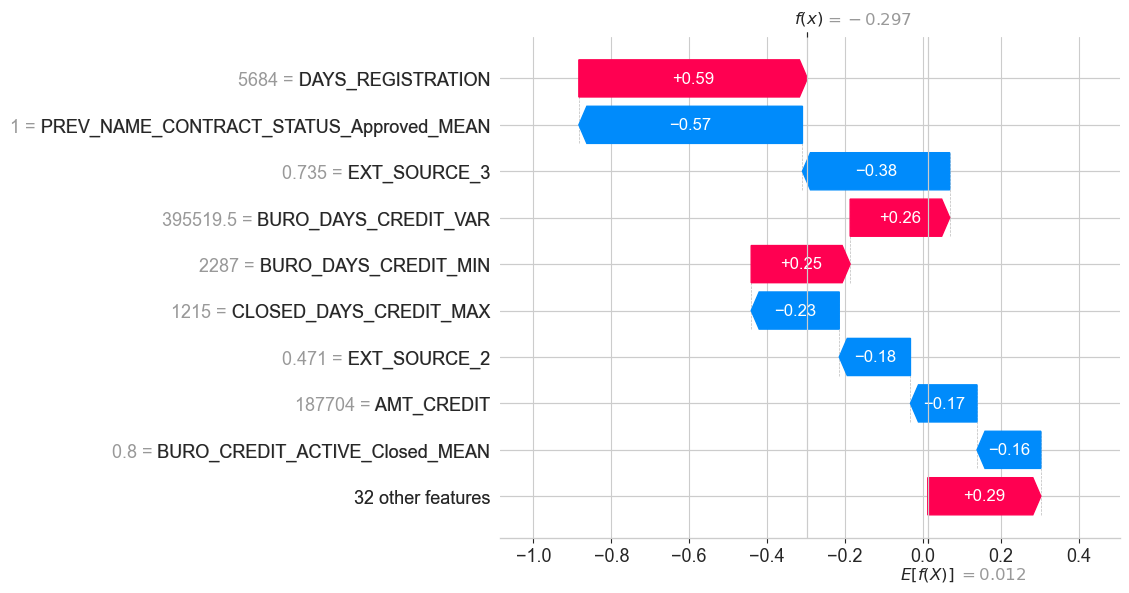

In [164]:
shap.waterfall_plot(tree_explainer(X_val_test)[id])

- Target = 0 : Individu ID = 231389 (id = 1)

In [165]:
id = 1

In [166]:
shap.initjs()
print("Individu ID: {}".format(X_val_test.index[id]))
shap.force_plot(
    tree_explainer.expected_value,
    shap_values_target[id],
    X_val_test.values[id],
    feature_names = X_val_test.columns
)

Individu ID: 231389


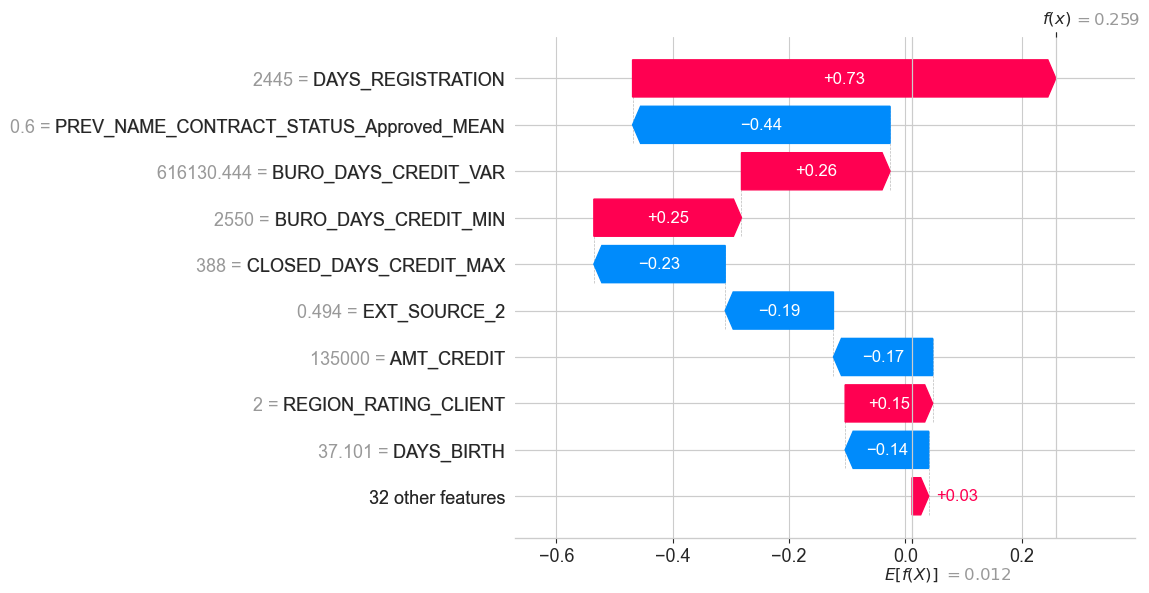

In [167]:
shap.waterfall_plot(tree_explainer(X_val_test)[id])

**Target = 1 :**

In [168]:
df_X_val_test_1 = df_X_val_test.loc[(df_X_val_test['TARGET'] == 1), :].iloc[:2]
df_X_val_test_1.head()

EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
SK_ID_CURR                                           
229886          0.197549      0.132597   44.972603   
144924          0.267230      0.533482   30.109589   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  \
SK_ID_CURR                                           
229886                                    0.454545   
144924                                    0.454545   

            BURO_CREDIT_ACTIVE_Closed_MEAN  BURO_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                         
229886                            0.333333                1417.0   
144924                            0.666667                1141.0   

            DAYS_EMPLOYED  REGION_RATING_CLIENT  \
SK_ID_CURR                                        
229886             2643.0                     2   
144924             2951.0                     2   

            PREV_NAME_PRODUCT_TYPE_walkin_MEAN  DAYS_EMPLOYED_PERC  \
SK_ID_CURR                                                           
229886                                0.181818            0.161011   
144924                                0.363636            0.268517   

            DAYS_LAST_PHONE_CHANGE  CODE_GENDER  NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                             
229886                       266.0            1                  5.0   
144924                       667.0            1                  2.0   

            BURO_DAYS_CREDIT_MAX  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                                  
229886                     543.0           2197.0                       0   
144924                     246.0           3658.0                       0   

            CLOSED_DAYS_CREDIT_MAX  BURO_CREDIT_ACTIVE_Active_MEAN  \
SK_ID_CURR                                                           
229886                       980.0                        0.666667   
144924                       379.0                        0.333333   

            NAME_INCOME_TYPE  FLAG_EMP_PHONE  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                                                             
229886                   8.0               1                       0   
144924                   8.0               1                       0   

            FLAG_DOCUMENT_3  ACTIVE_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_VAR  \
SK_ID_CURR                                                                  
229886                    1                   543.0         190969.000000   
144924                    1                   246.0         164265.066667   

            DAYS_REGISTRATION  CLOSED_DAYS_CREDIT_VAR  \
SK_ID_CURR                                              
229886                 5541.0                    0.00   
144924                 2525.0               121820.25   

            PREV_NAME_CONTRACT_STATUS_Approved_MEAN  PREV_DAYS_DECISION_MIN  \
SK_ID_CURR                                                                    
229886                                     0.454545                  2138.0   
144924                                     0.272727                   667.0   

            OCCUPATION_TYPE  HOUSETYPE_MODE_blockofflats  CNT_CHILDREN  \
SK_ID_CURR                                                               
229886                  2.0                            0             0   
144924                  9.0                            0             3   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
229886              216000.0    314100.0      16573.5         225000.0   
144924              270000.0    450000.0      27193.5         450000.0   

            NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  NAME_TYPE_SUITE  \
SK_ID_CURR                                                           
229886                     6.0                2.0             

In [169]:
i = -1
for index, row in df_X_val_test.iterrows():
    i += 1
    if (row['TARGET'] == 1):
        print(f"{i} : {index}")

13 : 229886
36 : 144924
45 : 256034
49 : 154530
69 : 190622
75 : 386402
82 : 137916
163 : 415282
165 : 409679
206 : 415322
216 : 354752
225 : 365204
253 : 432334
260 : 115975
261 : 183210
271 : 398808
278 : 243495
287 : 384644
303 : 298333
313 : 285802
321 : 233576
330 : 406894
331 : 212683
336 : 309115
359 : 216657
365 : 448025
370 : 339784
405 : 328382
406 : 316670
415 : 414094
427 : 420501
453 : 135140
477 : 385801
484 : 108686
498 : 192735
502 : 169928
509 : 117386
523 : 190815
535 : 129001
547 : 400084
581 : 298019
597 : 141499
598 : 407887
622 : 341393
669 : 140611
693 : 193495
699 : 405604
704 : 427231
716 : 274761
721 : 214840
727 : 110741
729 : 180533
754 : 385187
768 : 335772
788 : 378315
791 : 380611
801 : 428657
809 : 132366
810 : 434867
822 : 237241
835 : 295858
840 : 361882
900 : 225230
944 : 443151
958 : 236001
973 : 101042
978 : 320334
987 : 302143
1025 : 356774
1048 : 401981
1056 : 441600
1084 : 325413
1090 : 421347
1107 : 404913
1121 : 289595
1123 : 147536
1134 : 3502

- Target = 1 : Individu ID = 229886 (id = 13)

In [170]:
id = 13

In [171]:
shap.initjs()
print("Individu ID: {}".format(X_val_test.index[id]))
shap.force_plot(
    tree_explainer.expected_value,
    shap_values_target[id],
    X_val_test.values[id],
    feature_names = X_val_test.columns
)

Individu ID: 229886


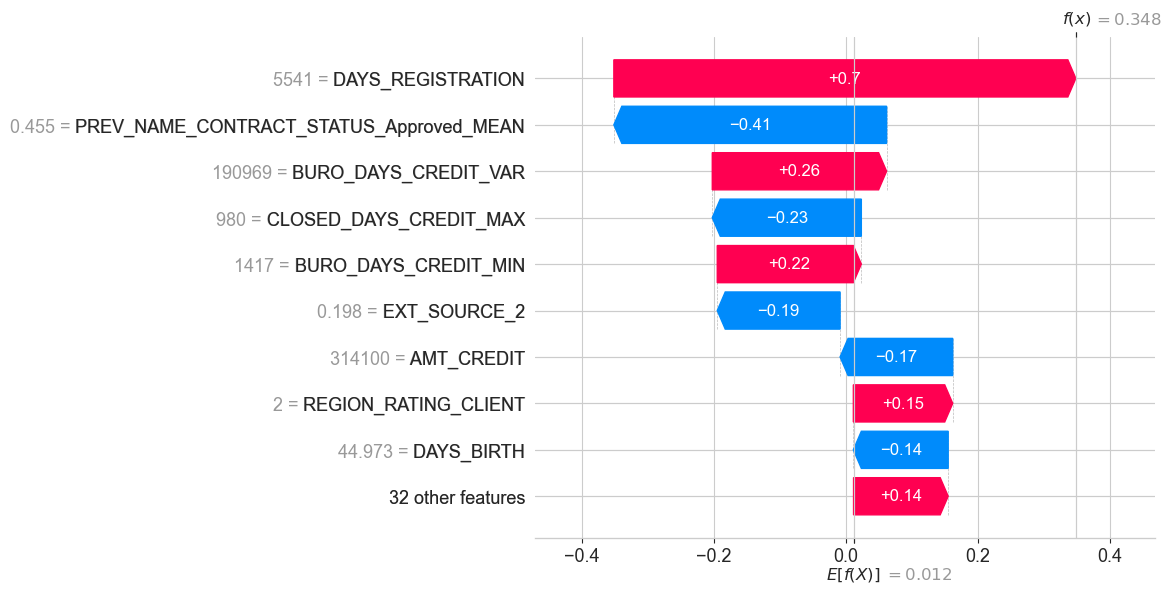

In [172]:
shap.waterfall_plot(tree_explainer(X_val_test)[id])

- Target = 1 : Individu ID = 144924 (id = 36)

In [173]:
id = 36

In [174]:
shap.initjs()
print("Individu ID: {}".format(X_val_test.index[id]))
shap.force_plot(
    tree_explainer.expected_value,
    shap_values_target[id],
    X_val_test.values[id],
    feature_names = X_val_test.columns
)

Individu ID: 144924


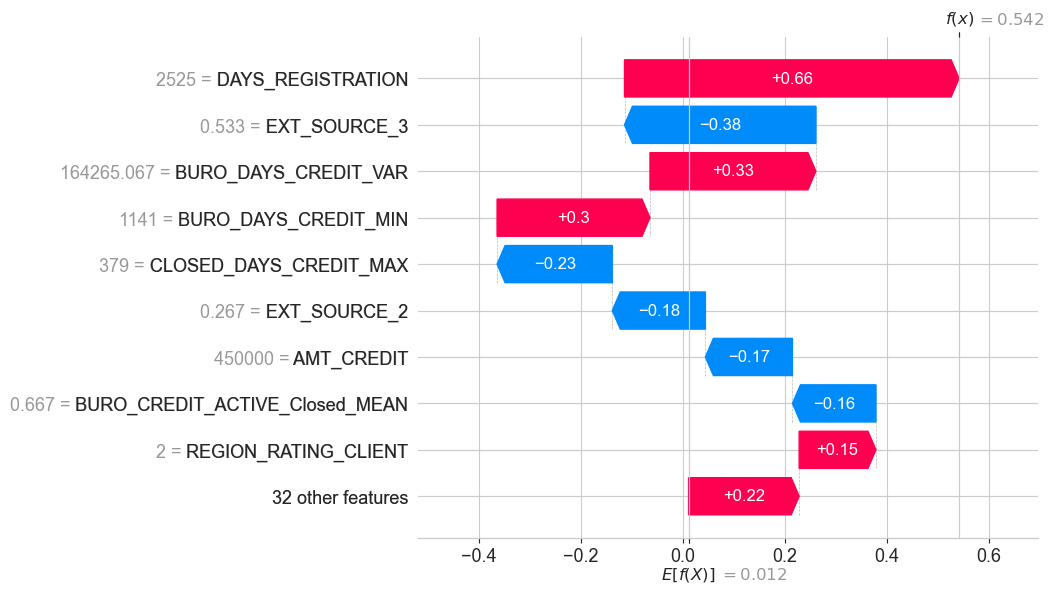

In [175]:
shap.waterfall_plot(tree_explainer(X_val_test)[id])

# <a id='toc6_'></a>[Exportation du modèle final](#toc0_)

- Dataset :

In [176]:
import dill
with open(path_datas_save + 'dict_agg.pkl', 'rb') as file:
    dict_agg = dill.load(file)

In [177]:
X_train = dict_agg['X_train']
y_train = dict_agg['y_train']
X_test = dict_agg['X_test']

In [178]:
X = X_train
y = y_train
X_train, y_train, X_val, y_val, X_val_test, y_val_test, X_train_scaled, X_val_scaled, X_val_test_scaled = fc_data_scaled(path_models, X, y)

- Modèle final :

[LightGBM] [Info] Number of positive: 19860, number of negative: 19860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5622
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

Score métier :0.38
Accuracy score : 0.63
Precision score : 0.15
Recall score : 0.76
F1 score : 0.25
Fbeta score : 0.42
ROC AUC score : 0.69


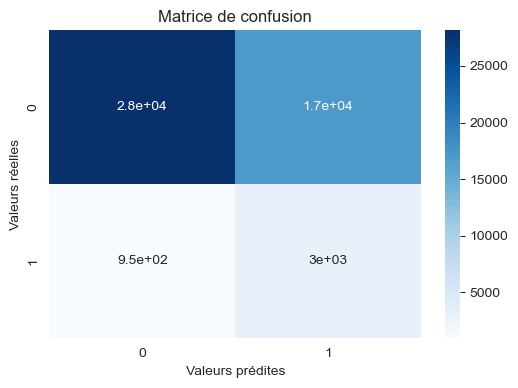

🏃 View run Modèle final at: http://127.0.0.1:5000/#/experiments/0/runs/4fff3fea78e94791b5cd4a327348f950
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


In [179]:
cols = X_train.select_dtypes(['float64']).columns
preprocessor = ColumnTransformer(
    [('quanti', StandardScaler(), cols)],
    remainder='passthrough'
)

model_final = Pipeline(steps = [
    ['scaler', preprocessor],
    ['sampling',RandomUnderSampler()],
    ['classifier', LGBMClassifier(
        learning_rate=0.2,
        max_depth=2,
        n_estimators=300,
        num_leaves=7,
        random_state=SEED
    )]
])

with mlflow.start_run(run_name='Modèle final'):
    model_final.fit(X_train, y_train)
    
    # Calcul et enregistrement des metriques sur les données de validation
    score_metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba =\
    fc_eval_score(model_final, X_val, y_val, seuil=0.45)
   
    mlflow.log_metric("val_score_métier", score_metier)
    mlflow.log_metric("val_accuracy", accuracy)
    mlflow.log_metric("val_precision", precision)
    mlflow.log_metric("val_recall", recall)
    mlflow.log_metric("val_f1_score", f1_score)
    mlflow.log_metric("val_fbeta_score", fbeta_score)
    mlflow.log_metric("val_rocauc", rocauc)

- Feature importance :

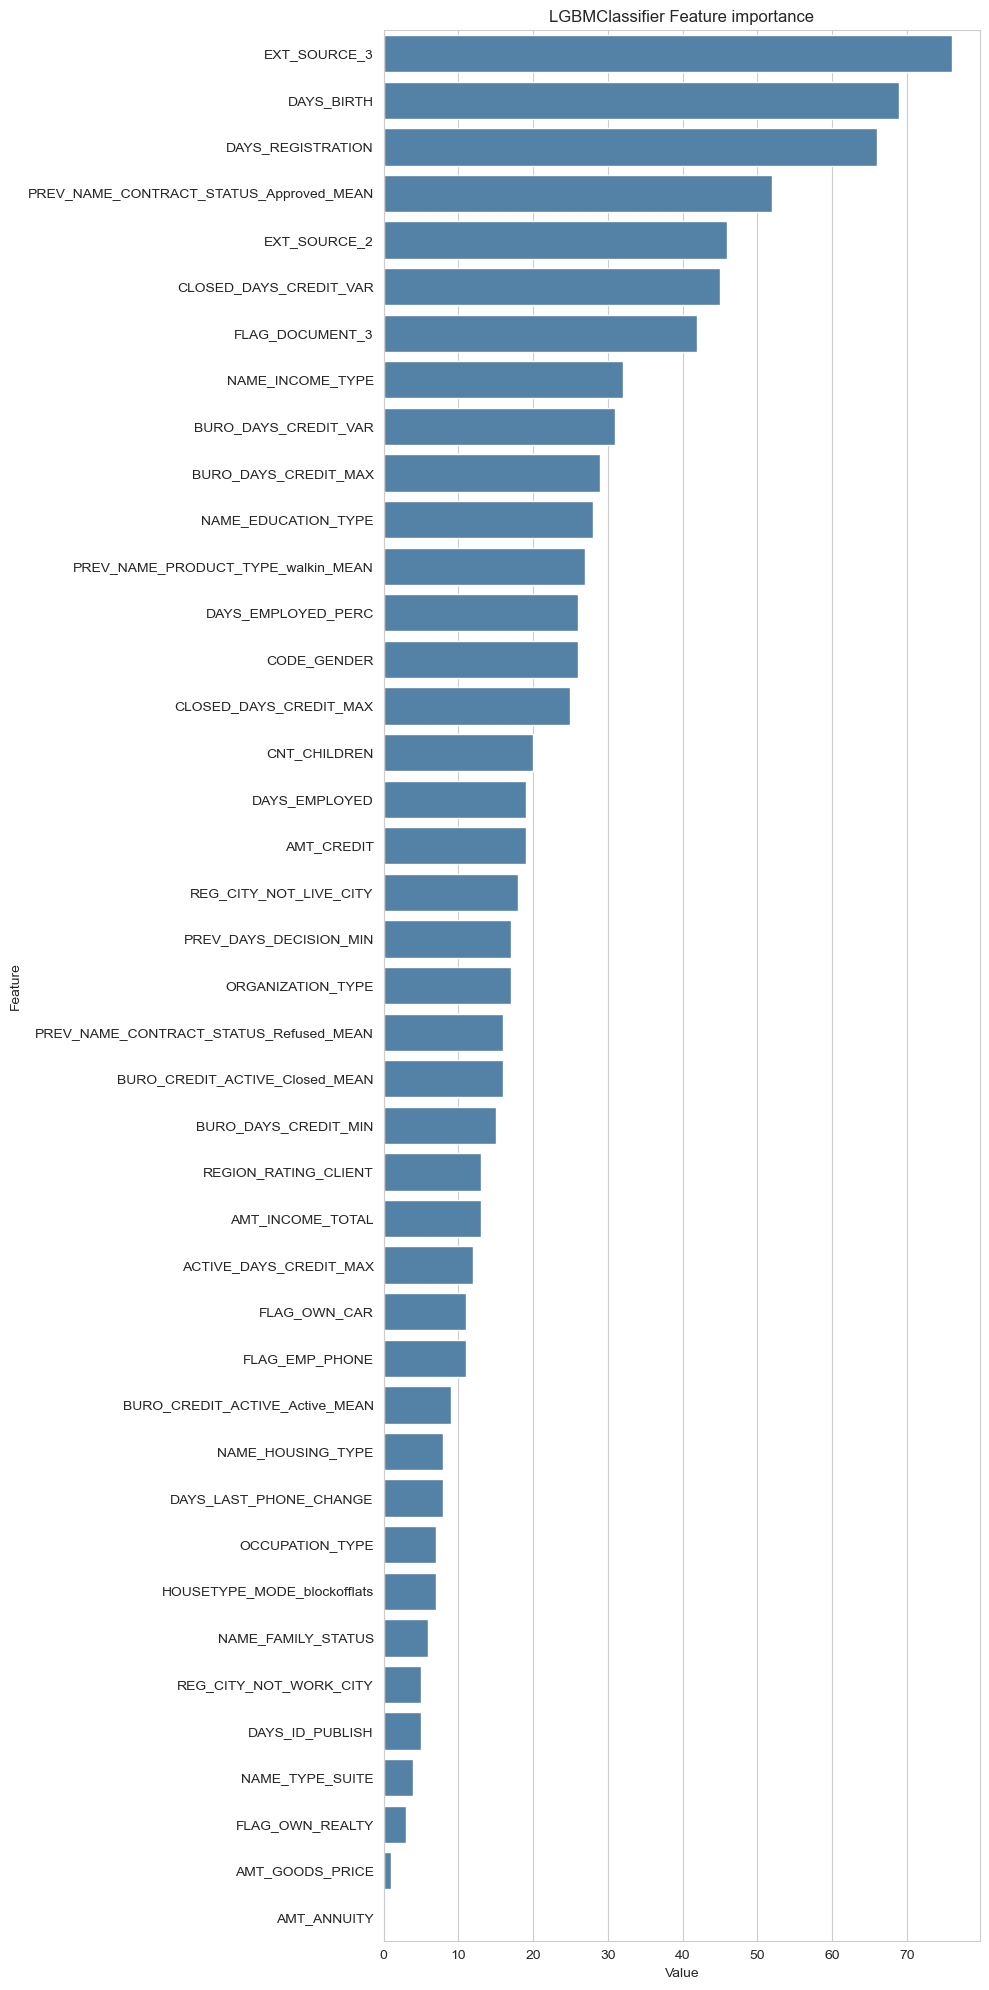

In [180]:
# Récupération de l'importance des features
df_feature_imp = pd.DataFrame(
    sorted(
        zip(model_final['classifier'].feature_importances_, X_train.columns),
        reverse=True
    ),
    columns=['Value', 'Feature']
)

# importance de chaque feature sur le total (%)
df_feature_imp["pct"] = (df_feature_imp.Value / sum(df_feature_imp.Value)) * 100

# importance de chaque feature sur le total (somme cumulée %)
df_feature_imp["pct_cum"] = np.cumsum(df_feature_imp["pct"])

# Représentation graphique
plt.figure(figsize=(10, 20))
sns.barplot(
    x="Value",
    y="Feature",
    data=df_feature_imp.iloc[:70],
    color='steelblue'
)
plt.title('LGBMClassifier Feature importance')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Importance value')

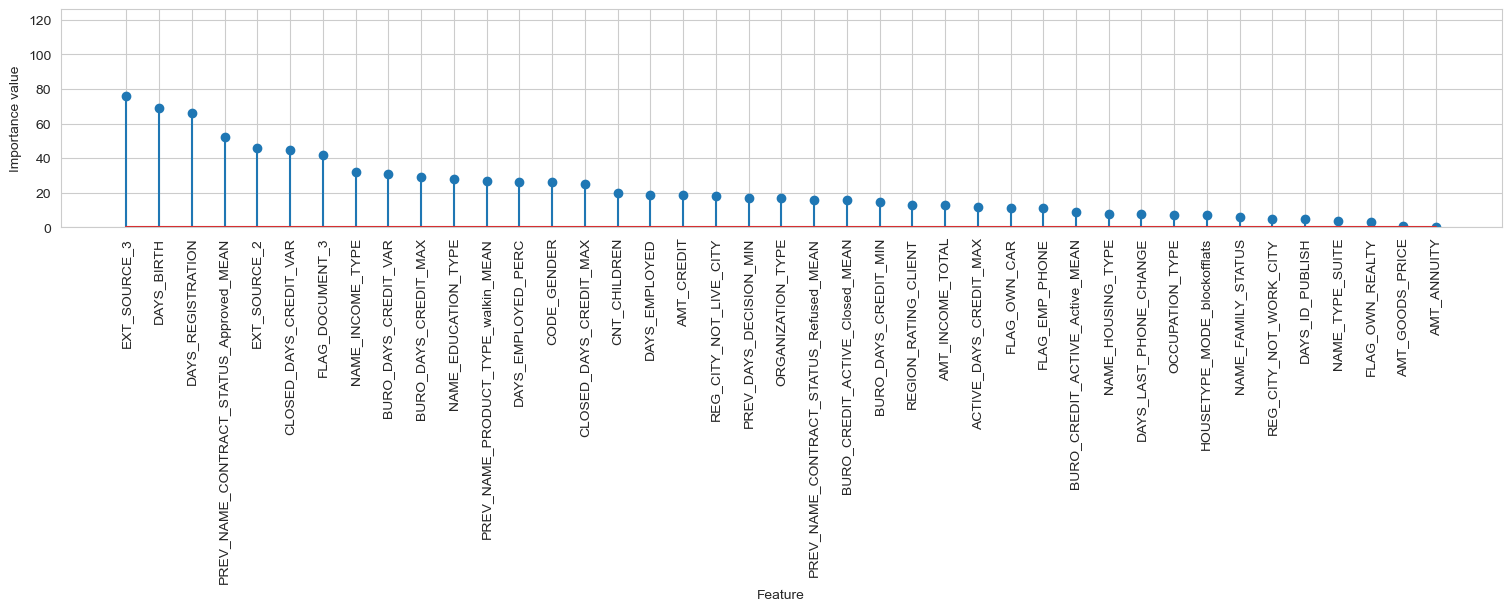

In [181]:
plt.figure(figsize=(15, 6), dpi=100, constrained_layout=True)
plt.stem(df_feature_imp['Value'].iloc[:100])
plt.xticks(range(0, len(df_feature_imp.iloc[:100].index)),
           df_feature_imp['Feature'].iloc[:100], rotation=90)
plt.ylim(0, df_feature_imp['Value'].iloc[:100].max() + 50)
plt.xlabel("Feature")
plt.ylabel('Importance value')

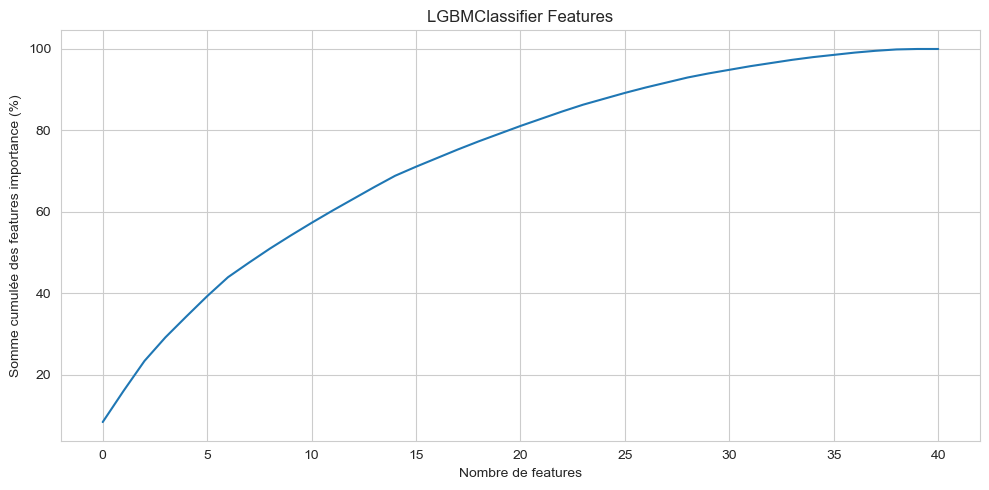

In [182]:
# Représentation graphique de la somme cumulée (%) de chaque feature
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_feature_imp.index, y="pct_cum", data=df_feature_imp)
plt.title('LGBMClassifier Features')
plt.xlabel("Nombre de features")
plt.ylabel("Somme cumulée des features importance (%)")
plt.tight_layout()
plt.show()

- Signature MLFlow :

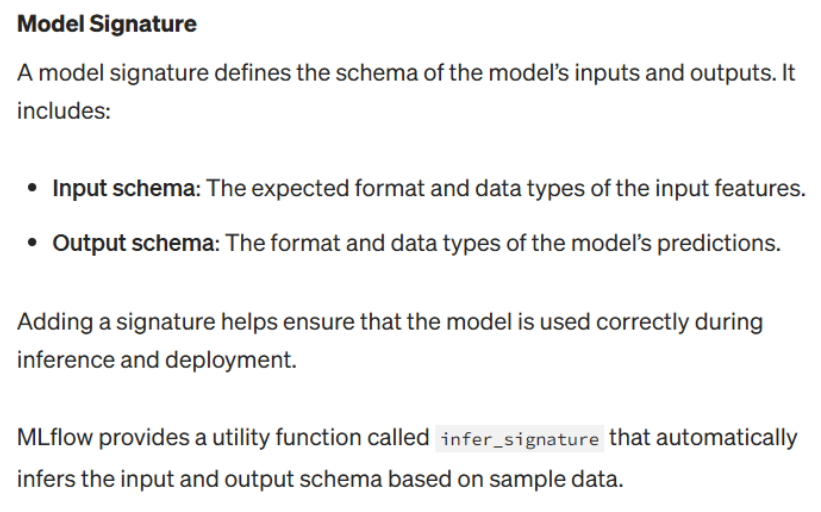

In [183]:
signature = infer_signature(X_train, y_train)
mlflow.sklearn.save_model(model_final, path_model_final, signature=signature)

In [184]:
fc.save_joblib(model_final, "model_final.joblib", path_model_final)
model_final = fc.load_joblib("model_final.joblib", path_model_final)

In [185]:
df_datas_train.head()

EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
SK_ID_CURR                                           
100002          0.262949      0.139376   25.920548   
100003          0.622246      0.535276   45.931507   
100004          0.555912      0.729567   52.180822   
100006          0.650442      0.535276   52.068493   
100007          0.322738      0.535276   54.608219   

            PREV_NAME_CONTRACT_STATUS_Refused_MEAN  \
SK_ID_CURR                                           
100002                                    0.000000   
100003                                    0.000000   
100004                                    0.000000   
100006                                    0.111111   
100007                                    0.000000   

            BURO_CREDIT_ACTIVE_Closed_MEAN  BURO_DAYS_CREDIT_MIN  \
SK_ID_CURR                                                         
100002                                0.75                1437.0   
100003                                0.75                2586.0   
100004                                1.00                1326.0   
100006                                0.00                   0.0   
100007                                1.00                1149.0   

            DAYS_EMPLOYED  REGION_RATING_CLIENT  \
SK_ID_CURR                                        
100002              637.0                     2   
100003             1188.0                     1   
100004              225.0                     2   
100006             3039.0                     2   
100007             3038.0                     2   

            PREV_NAME_PRODUCT_TYPE_walkin_MEAN  DAYS_EMPLOYED_PERC  \
SK_ID_CURR                                                           
100002                                0.000000            0.067329   
100003                                0.000000            0.070862   
100004                                0.000000            0.011814   
100006                                0.000000            0.159905   
100007                                0.166667            0.152418   

            DAYS_LAST_PHONE_CHANGE  CODE_GENDER  NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                             
100002                      1134.0            0                  5.0   
100003                       828.0            1                  2.0   
100004                       815.0            0                  5.0   
100006                       617.0            1                  5.0   
100007                      1106.0            0                  5.0   

            BURO_DAYS_CREDIT_MAX  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                                  
100002                     103.0           2120.0                       0   
100003                     606.0            291.0                       0   
100004                     408.0           2531.0                       0   
100006                       0.0           2437.0                       0   
100007                    1149.0           3458.0                       1   

            CLOSED_DAYS_CREDIT_MAX  BURO_CREDIT_ACTIVE_Active_MEAN  \
SK_ID_CURR                                                           
100002                       476.0                            0.25   
100003                       775.0                            0.25   
100004                       408.0                            0.00   
100006                         0.0                            0.00   
100007                      1149.0                            0.00   

            NAME_INCOME_TYPE  FLAG_EMP_PHONE  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                                                             
100002                   8.0               1                       0   
100003                   5.0               1                       0   
100004                   8.0               1                       0   
100006                   8.0    

In [186]:
df_datas_train.shape

(307507, 42)